In [1]:
%load_ext autoreload
%autoreload 2

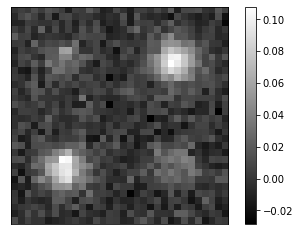

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def gkern(kernlen=21, nsig=3):
    import numpy
    import scipy.stats as st
    
    """Returns a 2D Gaussian kernel array."""
    
    interval = (2*nsig+1.)/(kernlen)
    x = numpy.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = numpy.diff(st.norm.cdf(x))
    kernel_raw = numpy.sqrt(numpy.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

## Simulate Data
np.random.seed(1)

N = 512 # number of subjects in a group
labels = np.zeros((N*2,))
labels[N:] = 1

# 2 confounding effects between 2 groups
cf = np.zeros((N*2,))
cf[:N] = np.random.uniform(1,4,size=N)
cf[N:] = np.random.uniform(3,6,size=N)

# 2 major effects between 2 groups
mf = np.zeros((N*2,))
mf[:N] = np.random.uniform(1,4,size=N)
mf[N:] = np.random.uniform(3,6,size=N)

# simulate images
x = np.zeros((N*2,32,32,1))
y = np.zeros((N*2,))
y[N:] = 1
for i in range(N*2):
    x[i,:16,:16,0] = gkern(kernlen=16, nsig=5)*mf[i]
    x[i,16:,:16,0] = gkern(kernlen=16, nsig=5)*cf[i]
    x[i,:16,16:,0] = gkern(kernlen=16, nsig=5)*cf[i]
    x[i,16:,16:,0] = gkern(kernlen=16, nsig=5)*mf[i]
    x[i] = x[i] + np.random.normal(0,0.01,size=(32,32,1))

plt.imshow(x[1,:,:,0],cmap='gray')
plt.colorbar()
#plt.title("a synthetic training image");
plt.xticks(np.arange(0), ())
plt.yticks(np.arange(0), ())
plt.savefig('synthetic_sample.jpg', format='jpg', dpi=300)

In [9]:
np.max(gkern())

0.007563093417643524

In [12]:
import torch
x = torch.from_numpy(x)
torch.save(x, "train.pt")

/sailhome/jphwa/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/sailhome/jphwa/env/lib/python3.8/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/sailhome/jphwa/env/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:492: UserWarning: Falling back to uncompiled AVL fast distance covariance because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(float32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


iter = 0 , acc = 0.5 , dcorr = 0.05525758555742563
Iter: 0, D: 2.114, G:1.027
loss:  0.6898439526557922



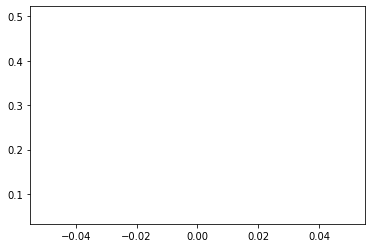

iter = 1 , acc = 0.5 , dcorr = 0.05301649120973817
Iter: 1, D: 2.104, G:0.9572
loss:  0.6969385147094727



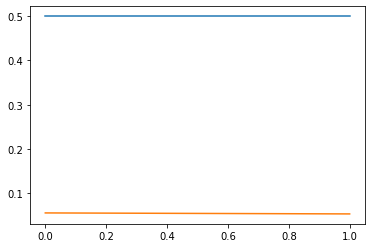

iter = 2 , acc = 0.5 , dcorr = 0.05221253077726426
Iter: 2, D: 2.11, G:0.9604
loss:  0.691287636756897



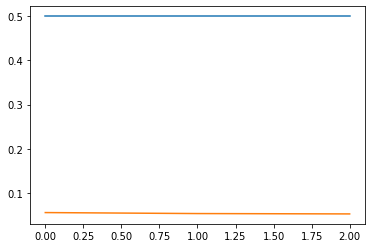

iter = 3 , acc = 0.5 , dcorr = 0.054870382014109126
Iter: 3, D: 2.107, G:0.9124
loss:  0.6916631460189819



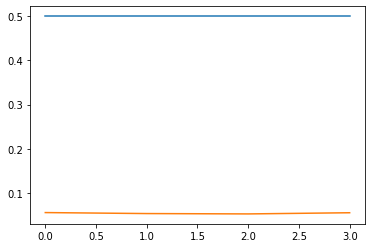

iter = 4 , acc = 0.5 , dcorr = 0.053591772605385175
Iter: 4, D: 2.103, G:0.898
loss:  0.6968435049057007



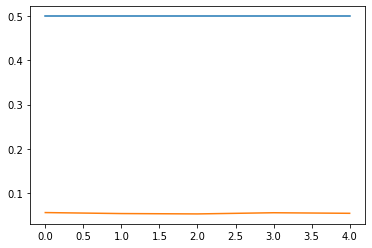

iter = 5 , acc = 0.5 , dcorr = 0.05012171086962906
Iter: 5, D: 2.103, G:0.8915
loss:  0.6950423717498779



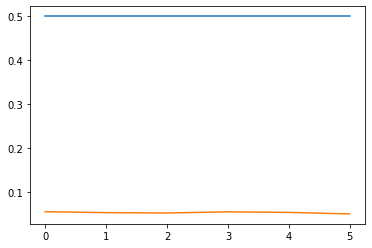

iter = 6 , acc = 0.494140625 , dcorr = 0.0451693706738545
Iter: 6, D: 2.1, G:0.8607
loss:  0.6953189969062805



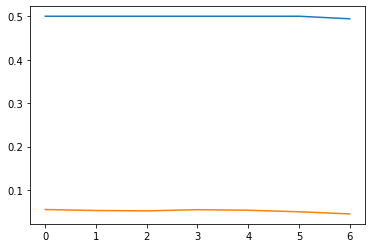

iter = 7 , acc = 0.5 , dcorr = 0.04288506962450992
Iter: 7, D: 2.101, G:0.8401
loss:  0.6942100524902344



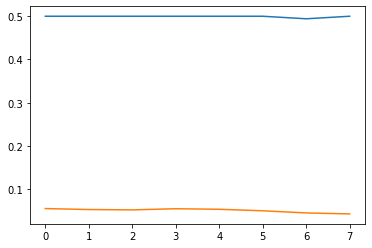

iter = 8 , acc = 0.5 , dcorr = 0.043710772032140265
Iter: 8, D: 2.099, G:0.825
loss:  0.6944068670272827



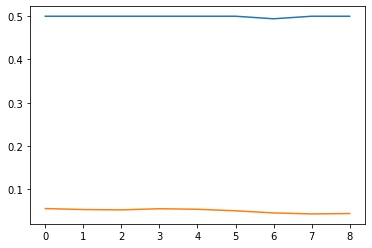

iter = 9 , acc = 0.5 , dcorr = 0.04598267450590168
Iter: 9, D: 2.098, G:0.808
loss:  0.6946946978569031



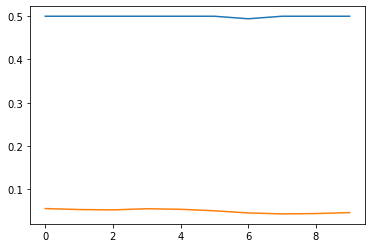

iter = 10 , acc = 0.5 , dcorr = 0.04962911895886902
Iter: 10, D: 2.097, G:0.7973
loss:  0.6951491832733154



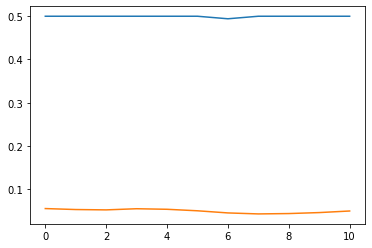

iter = 11 , acc = 0.5 , dcorr = 0.0533791606668378
Iter: 11, D: 2.098, G:0.7841
loss:  0.6928275227546692



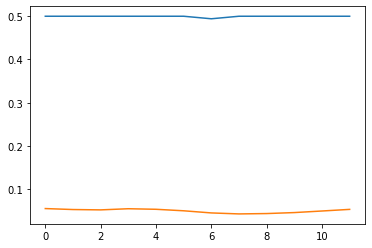

iter = 12 , acc = 0.5 , dcorr = 0.05819857308305967
Iter: 12, D: 2.095, G:0.7733
loss:  0.6947230696678162



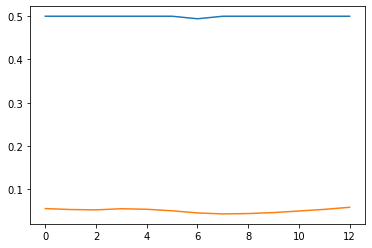

iter = 13 , acc = 0.5 , dcorr = 0.06578392928755253
Iter: 13, D: 2.095, G:0.7586
loss:  0.6948258280754089



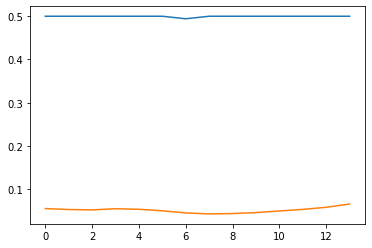

iter = 14 , acc = 0.5 , dcorr = 0.07521460288931966
Iter: 14, D: 2.092, G:0.7819
loss:  0.696330189704895



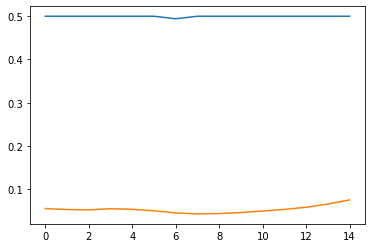

iter = 15 , acc = 0.5 , dcorr = 0.08474859248669665
Iter: 15, D: 2.094, G:0.7494
loss:  0.6934873461723328



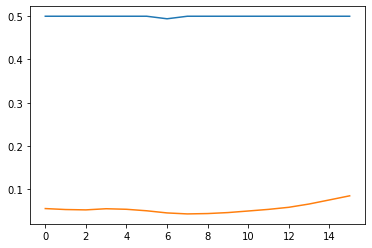

iter = 16 , acc = 0.5 , dcorr = 0.09496299539873188
Iter: 16, D: 2.09, G:0.7455
loss:  0.6969097256660461



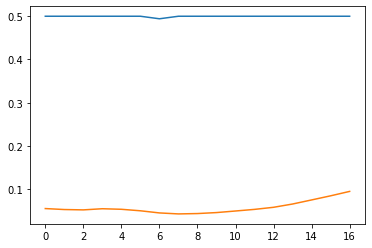

iter = 17 , acc = 0.5 , dcorr = 0.1091886164091452
Iter: 17, D: 2.087, G:0.7323
loss:  0.6988856792449951



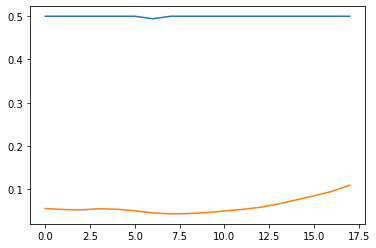

iter = 18 , acc = 0.5 , dcorr = 0.126924456086577
Iter: 18, D: 2.086, G:0.7349
loss:  0.698172390460968



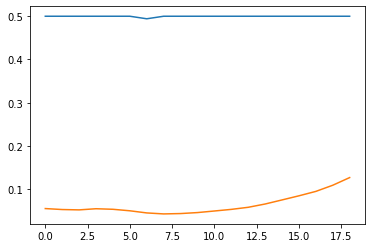

iter = 19 , acc = 0.5 , dcorr = 0.14197566727777233
Iter: 19, D: 2.096, G:0.7405
loss:  0.6894723176956177



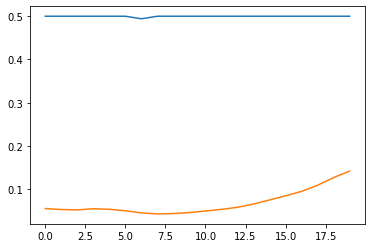

iter = 20 , acc = 0.5 , dcorr = 0.15040406873748743
Iter: 20, D: 2.091, G:0.7155
loss:  0.6925413608551025



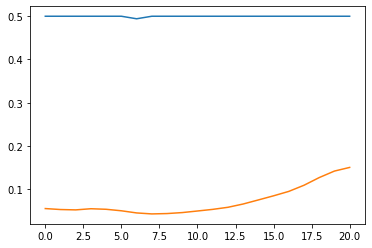

iter = 21 , acc = 0.5 , dcorr = 0.16133456749213462
Iter: 21, D: 2.088, G:0.7129
loss:  0.6949476003646851



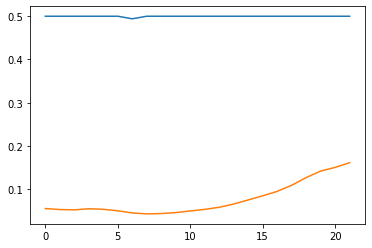

iter = 22 , acc = 0.5 , dcorr = 0.17157857186324263
Iter: 22, D: 2.094, G:0.7114
loss:  0.6888853311538696



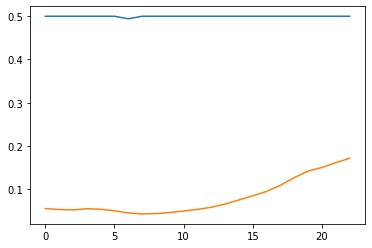

iter = 23 , acc = 0.5 , dcorr = 0.18993366239543807
Iter: 23, D: 2.075, G:0.7202
loss:  0.7056213021278381



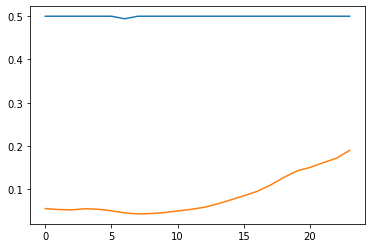

iter = 24 , acc = 0.5 , dcorr = 0.20029507657683632
Iter: 24, D: 2.082, G:0.7139
loss:  0.6974429488182068



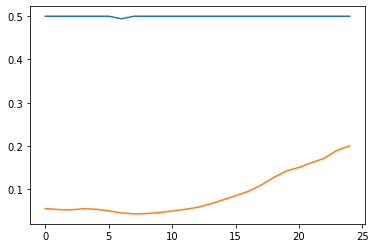

iter = 25 , acc = 0.5 , dcorr = 0.20370739210096045
Iter: 25, D: 2.076, G:0.7095
loss:  0.7035542726516724



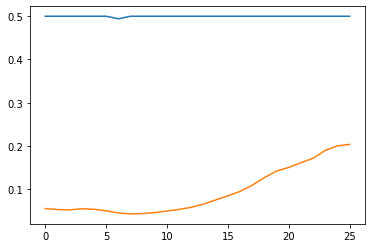

iter = 26 , acc = 0.5 , dcorr = 0.19229967463364808
Iter: 26, D: 2.084, G:0.703
loss:  0.6956254243850708



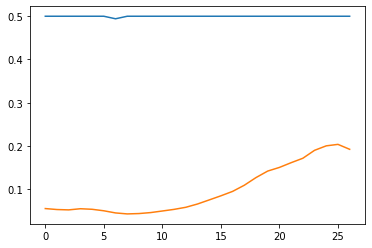

iter = 27 , acc = 0.5 , dcorr = 0.18888210268390696
Iter: 27, D: 2.071, G:0.7138
loss:  0.7054651975631714



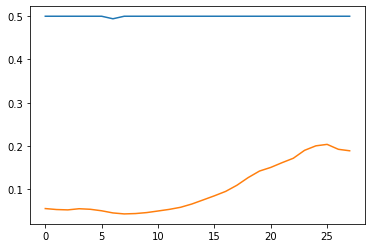

iter = 28 , acc = 0.5 , dcorr = 0.17663850329994615
Iter: 28, D: 2.095, G:0.6915
loss:  0.6860430240631104



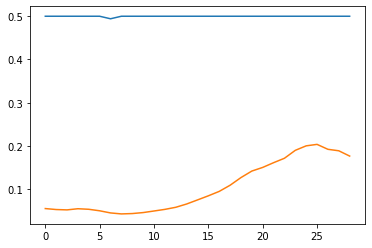

iter = 29 , acc = 0.5 , dcorr = 0.17403622793765552
Iter: 29, D: 2.102, G:0.6868
loss:  0.6785260438919067



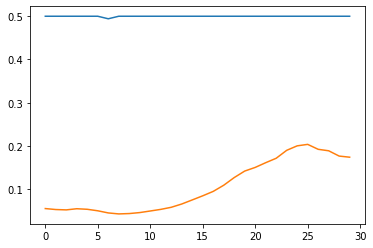

iter = 30 , acc = 0.5 , dcorr = 0.16986744845373908
Iter: 30, D: 2.065, G:0.7123
loss:  0.711056113243103



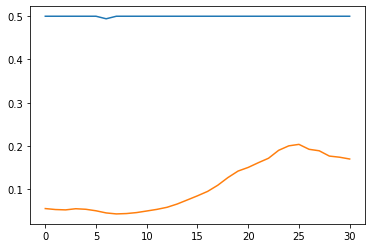

iter = 31 , acc = 0.5 , dcorr = 0.1593960994458783
Iter: 31, D: 2.092, G:0.6922
loss:  0.6868155598640442



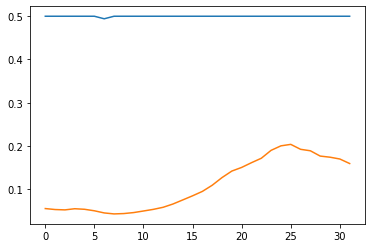

iter = 32 , acc = 0.5 , dcorr = 0.1491218341153878
Iter: 32, D: 2.083, G:0.7003
loss:  0.6947132349014282



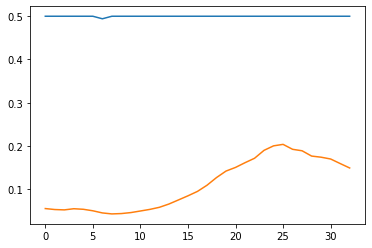

iter = 33 , acc = 0.5 , dcorr = 0.14394905913407352
Iter: 33, D: 2.091, G:0.6879
loss:  0.6878685355186462



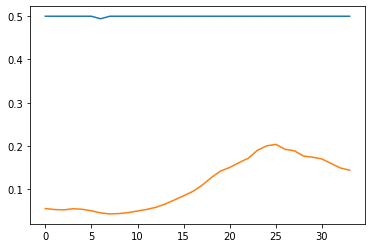

iter = 34 , acc = 0.5 , dcorr = 0.13608086820178272
Iter: 34, D: 2.079, G:0.6988
loss:  0.698027491569519



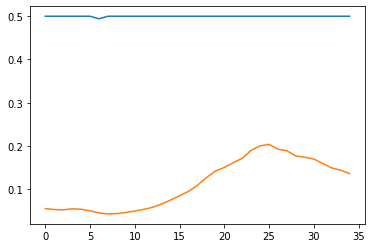

iter = 35 , acc = 0.5 , dcorr = 0.12725723398878605
Iter: 35, D: 2.077, G:0.6985
loss:  0.6982775926589966



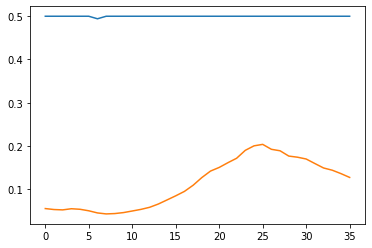

iter = 36 , acc = 0.5 , dcorr = 0.11983171547064801
Iter: 36, D: 2.082, G:0.6937
loss:  0.6935887932777405



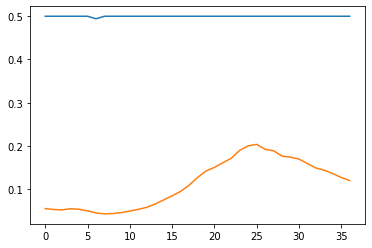

iter = 37 , acc = 0.5 , dcorr = 0.1170844664235775
Iter: 37, D: 2.089, G:0.6878
loss:  0.6876347661018372



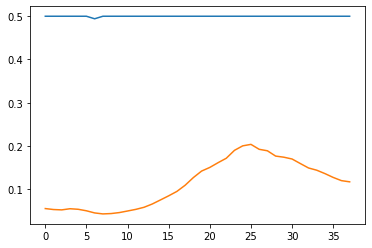

iter = 38 , acc = 0.5 , dcorr = 0.11339677026563108
Iter: 38, D: 2.077, G:0.7024
loss:  0.6976687908172607



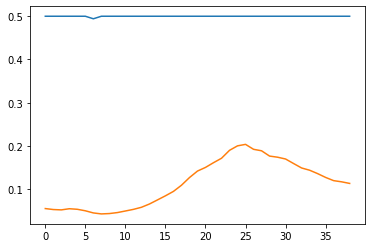

iter = 39 , acc = 0.5 , dcorr = 0.10978791346089374
Iter: 39, D: 2.083, G:0.6931
loss:  0.6927995681762695



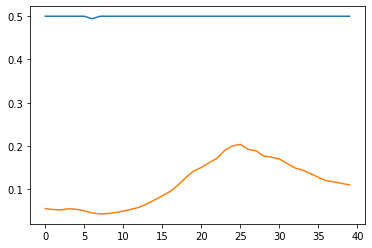

iter = 40 , acc = 0.5 , dcorr = 0.10568758040027992
Iter: 40, D: 2.078, G:0.6963
loss:  0.6960387229919434



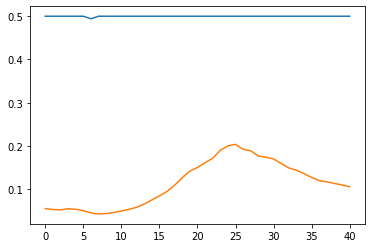

iter = 41 , acc = 0.5 , dcorr = 0.10243158709884966
Iter: 41, D: 2.082, G:0.6931
loss:  0.6926303505897522



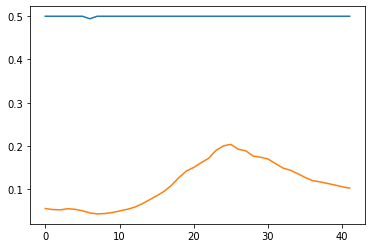

iter = 42 , acc = 0.5 , dcorr = 0.10050456129235993
Iter: 42, D: 2.082, G:0.6923
loss:  0.692200243473053



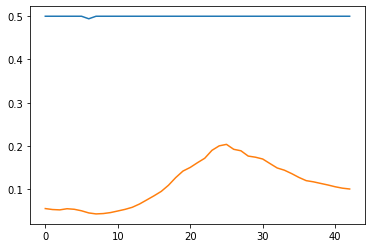

iter = 43 , acc = 0.5 , dcorr = 0.09951116958719042
Iter: 43, D: 2.088, G:0.6876
loss:  0.6876036524772644



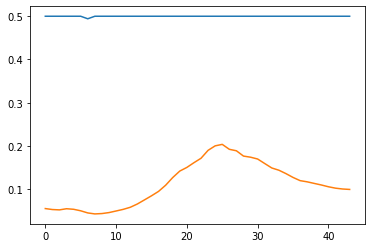

iter = 44 , acc = 0.5 , dcorr = 0.09900927568488255
Iter: 44, D: 2.084, G:0.6907
loss:  0.6904516220092773



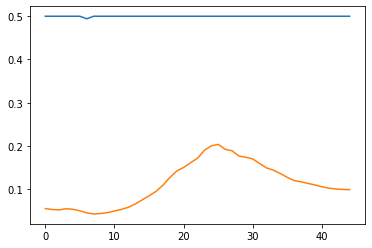

iter = 45 , acc = 0.5 , dcorr = 0.09833282670994371
Iter: 45, D: 2.086, G:0.6915
loss:  0.6894468069076538



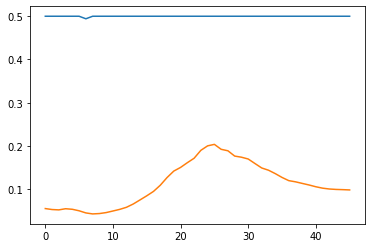

iter = 46 , acc = 0.5 , dcorr = 0.09691109779835895
Iter: 46, D: 2.08, G:0.6925
loss:  0.6924788951873779



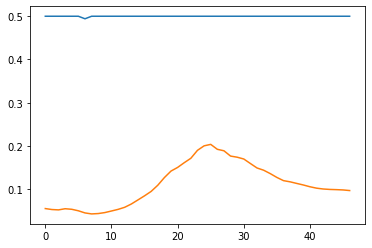

iter = 47 , acc = 0.5 , dcorr = 0.09553596905311232
Iter: 47, D: 2.084, G:0.6913
loss:  0.6897346377372742



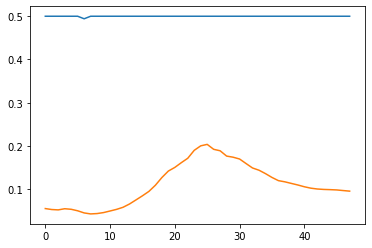

iter = 48 , acc = 0.5 , dcorr = 0.09481464746918072
Iter: 48, D: 2.082, G:0.6898
loss:  0.6896966099739075



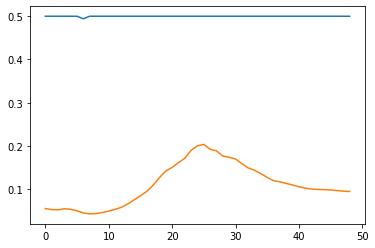

iter = 49 , acc = 0.5 , dcorr = 0.09403690992295556
Iter: 49, D: 2.081, G:0.6901
loss:  0.6900044083595276



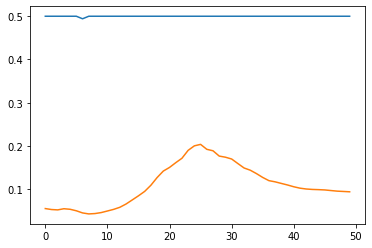

iter = 50 , acc = 0.5 , dcorr = 0.09398907857534869
Iter: 50, D: 2.083, G:0.6947
loss:  0.6896002292633057



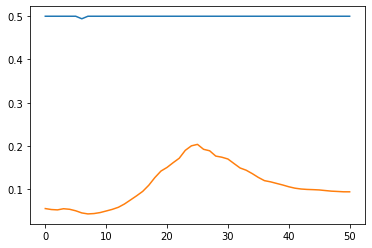

iter = 51 , acc = 0.5126953125 , dcorr = 0.0930030640116009
Iter: 51, D: 2.08, G:0.6904
loss:  0.6904106140136719



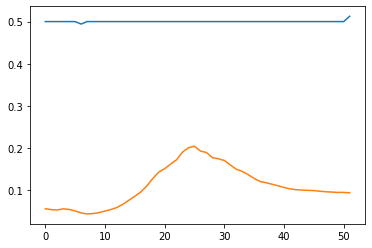

iter = 52 , acc = 0.7939453125 , dcorr = 0.09290413005537894
Iter: 52, D: 2.086, G:0.6891
loss:  0.6885754466056824



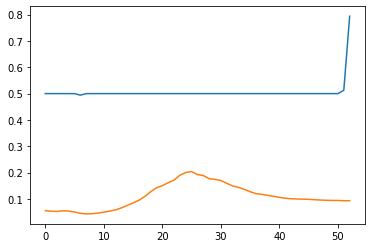

iter = 53 , acc = 0.8828125 , dcorr = 0.09251516147584339
Iter: 53, D: 2.081, G:0.6887
loss:  0.6881815791130066



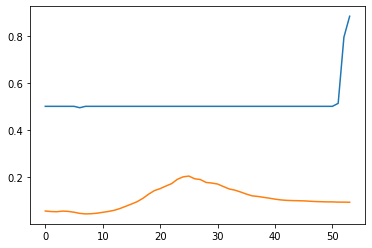

iter = 54 , acc = 0.859375 , dcorr = 0.0945616621143995
Iter: 54, D: 2.086, G:0.6892
loss:  0.6891250610351562



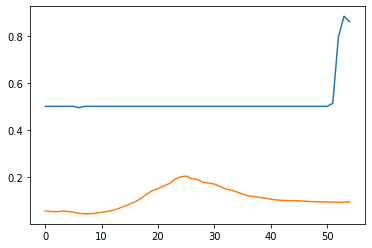

iter = 55 , acc = 0.9365234375 , dcorr = 0.09821764093927156
Iter: 55, D: 2.082, G:0.6891
loss:  0.6889142990112305



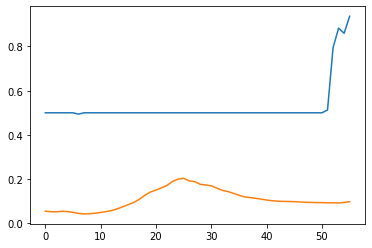

iter = 56 , acc = 0.8251953125 , dcorr = 0.10244750687613552
Iter: 56, D: 2.087, G:0.6875
loss:  0.6873441338539124



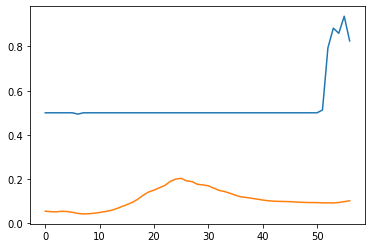

iter = 57 , acc = 0.81640625 , dcorr = 0.1046403722327683
Iter: 57, D: 2.083, G:0.6913
loss:  0.688418984413147



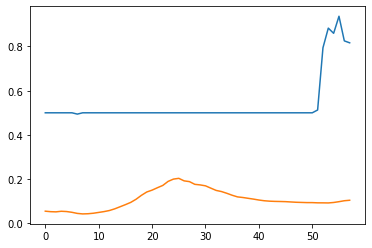

iter = 58 , acc = 0.8916015625 , dcorr = 0.10596155894803992
Iter: 58, D: 2.083, G:0.6931
loss:  0.6878623962402344



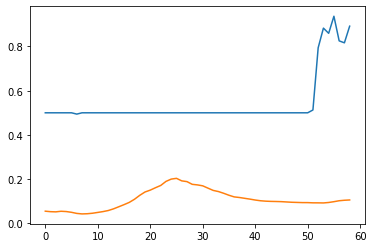

iter = 59 , acc = 0.935546875 , dcorr = 0.10803408790856578
Iter: 59, D: 2.082, G:0.6933
loss:  0.6875890493392944



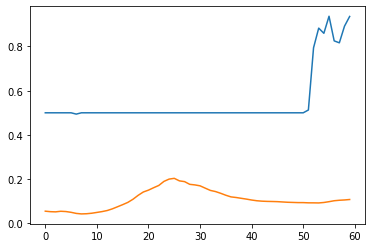

iter = 60 , acc = 0.8203125 , dcorr = 0.10886990040084672
Iter: 60, D: 2.082, G:0.6883
loss:  0.6873335838317871



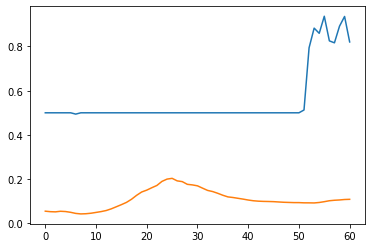

iter = 61 , acc = 0.8583984375 , dcorr = 0.11179392815838791
Iter: 61, D: 2.084, G:0.6886
loss:  0.6872391104698181



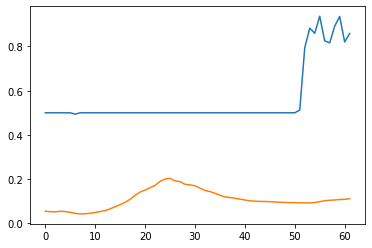

iter = 62 , acc = 0.919921875 , dcorr = 0.11503329138171856
Iter: 62, D: 2.084, G:0.6872
loss:  0.6866950392723083



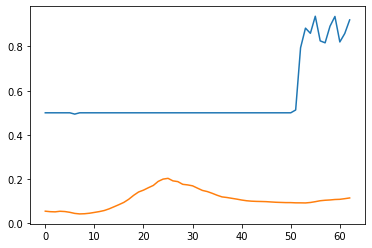

iter = 63 , acc = 0.83984375 , dcorr = 0.11661036466301372
Iter: 63, D: 2.083, G:0.6863
loss:  0.6862573027610779



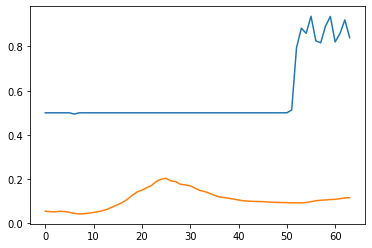

iter = 64 , acc = 0.8916015625 , dcorr = 0.11906143074247261
Iter: 64, D: 2.085, G:0.6863
loss:  0.6862637400627136



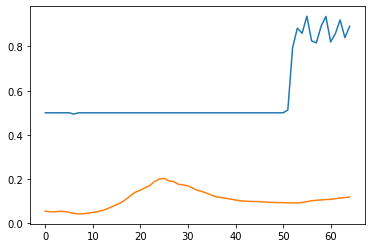

iter = 65 , acc = 0.9345703125 , dcorr = 0.1171223016154547
Iter: 65, D: 2.084, G:0.6854
loss:  0.6854097247123718



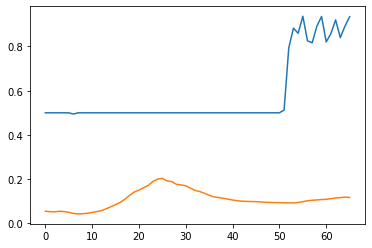

iter = 66 , acc = 0.93359375 , dcorr = 0.1131119340823639
Iter: 66, D: 2.085, G:0.6842
loss:  0.6840332746505737



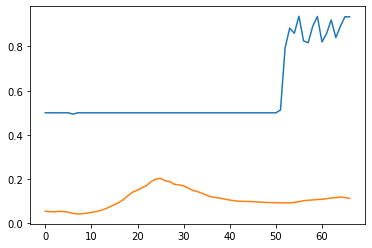

iter = 67 , acc = 0.9306640625 , dcorr = 0.12150145507477567
Iter: 67, D: 2.087, G:0.6876
loss:  0.6835746765136719



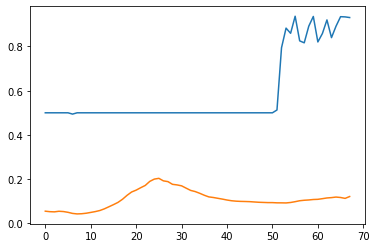

iter = 68 , acc = 0.916015625 , dcorr = 0.12663848621625917
Iter: 68, D: 2.083, G:0.6838
loss:  0.6831611394882202



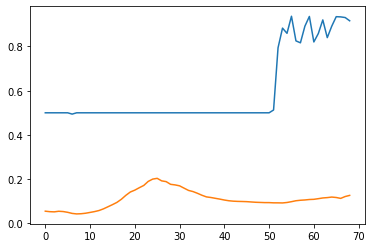

iter = 69 , acc = 0.69140625 , dcorr = 0.11065758969186869
Iter: 69, D: 2.084, G:0.6788
loss:  0.6787461638450623



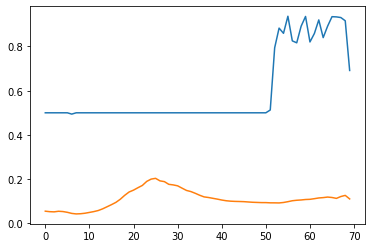

iter = 70 , acc = 0.5302734375 , dcorr = 0.10935126195301964
Iter: 70, D: 2.088, G:0.6795
loss:  0.6794471740722656



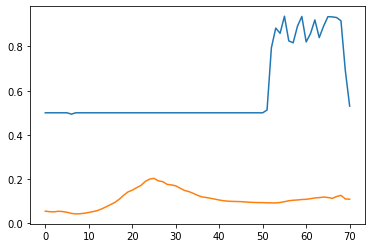

iter = 71 , acc = 0.51171875 , dcorr = 0.11436247836846425
Iter: 71, D: 2.088, G:0.6812
loss:  0.6811553239822388



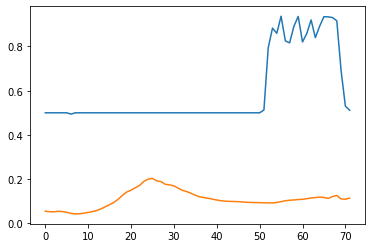

iter = 72 , acc = 0.51171875 , dcorr = 0.11983665379473785
Iter: 72, D: 2.091, G:0.6831
loss:  0.6781197786331177



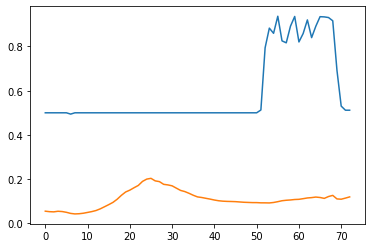

iter = 73 , acc = 0.5546875 , dcorr = 0.1280488438416616
Iter: 73, D: 2.088, G:0.6876
loss:  0.6812945604324341



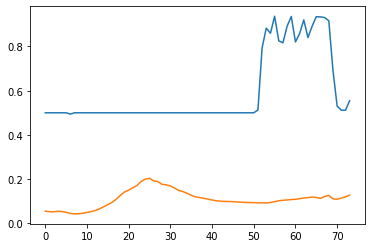

iter = 74 , acc = 0.6123046875 , dcorr = 0.1350974588782614
Iter: 74, D: 2.091, G:0.6769
loss:  0.6761468052864075



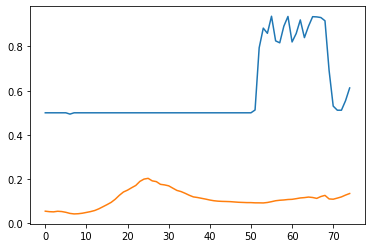

iter = 75 , acc = 0.669921875 , dcorr = 0.14255742612485806
Iter: 75, D: 2.09, G:0.6805
loss:  0.6782053709030151



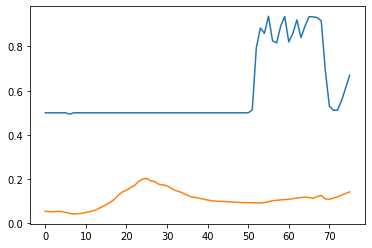

iter = 76 , acc = 0.669921875 , dcorr = 0.14786190296601884
Iter: 76, D: 2.094, G:0.676
loss:  0.6727006435394287



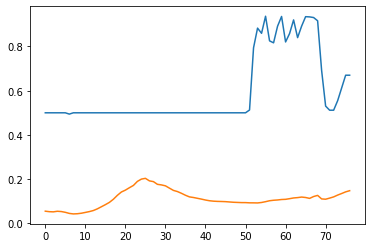

iter = 77 , acc = 0.638671875 , dcorr = 0.15253075955559328
Iter: 77, D: 2.094, G:0.6736
loss:  0.6728067398071289



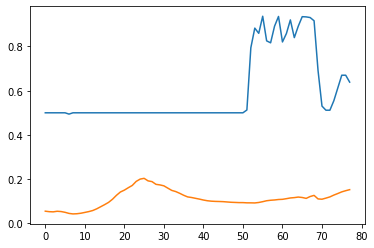

iter = 78 , acc = 0.6357421875 , dcorr = 0.15755088661208294
Iter: 78, D: 2.092, G:0.6751
loss:  0.6747845411300659



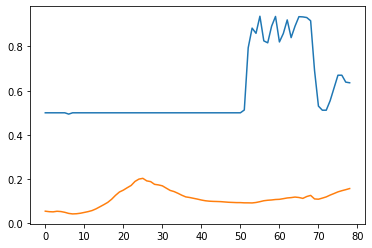

iter = 79 , acc = 0.703125 , dcorr = 0.16389821391035383
Iter: 79, D: 2.093, G:0.6743
loss:  0.6741949319839478



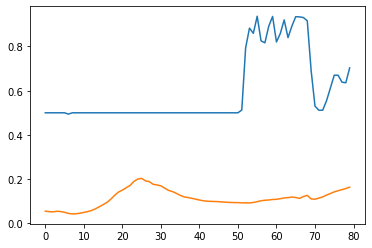

iter = 80 , acc = 0.76953125 , dcorr = 0.16863537532557882
Iter: 80, D: 2.097, G:0.6714
loss:  0.6713179349899292



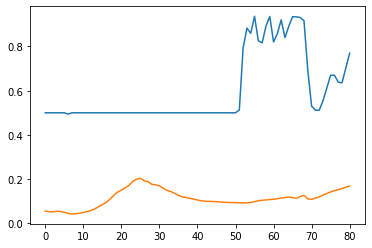

iter = 81 , acc = 0.6826171875 , dcorr = 0.1704582548424308
Iter: 81, D: 2.097, G:0.6711
loss:  0.6671077013015747



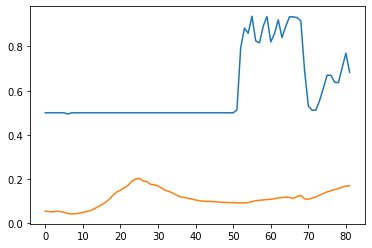

iter = 82 , acc = 0.6103515625 , dcorr = 0.1695224234408952
Iter: 82, D: 2.102, G:0.6647
loss:  0.6632629632949829



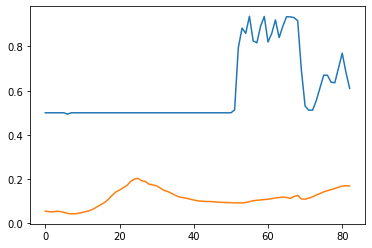

iter = 83 , acc = 0.611328125 , dcorr = 0.17379345014398984
Iter: 83, D: 2.095, G:0.6812
loss:  0.6731177568435669



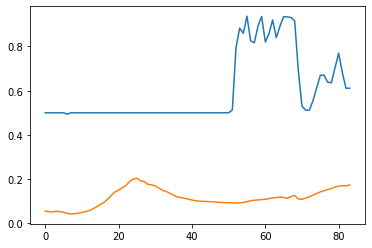

iter = 84 , acc = 0.67578125 , dcorr = 0.18149847940834735
Iter: 84, D: 2.099, G:0.672
loss:  0.667986273765564



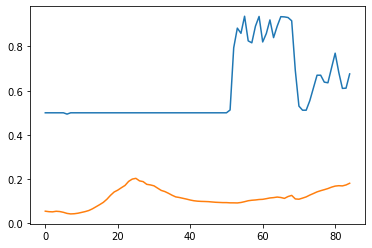

iter = 85 , acc = 0.78125 , dcorr = 0.1876783063588672
Iter: 85, D: 2.099, G:0.6706
loss:  0.6680306196212769



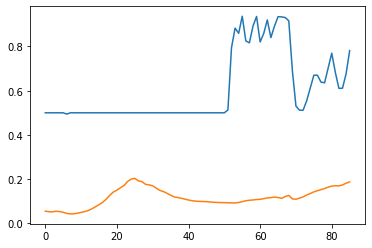

iter = 86 , acc = 0.853515625 , dcorr = 0.193798425258079
Iter: 86, D: 2.097, G:0.67
loss:  0.6687574982643127



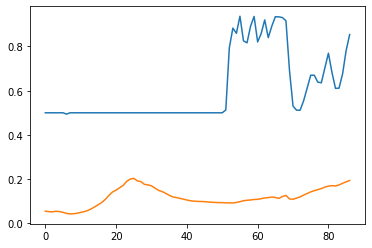

iter = 87 , acc = 0.892578125 , dcorr = 0.19875450983377763
Iter: 87, D: 2.102, G:0.6669
loss:  0.6632189750671387



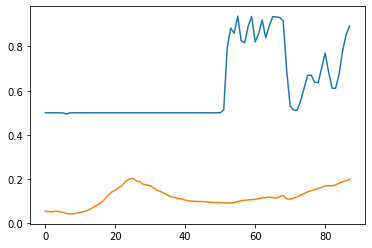

iter = 88 , acc = 0.810546875 , dcorr = 0.2000442519917769
Iter: 88, D: 2.103, G:0.6596
loss:  0.6585551500320435



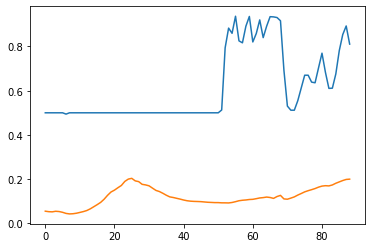

iter = 89 , acc = 0.8349609375 , dcorr = 0.20414195042366512
Iter: 89, D: 2.102, G:0.6718
loss:  0.6651652455329895



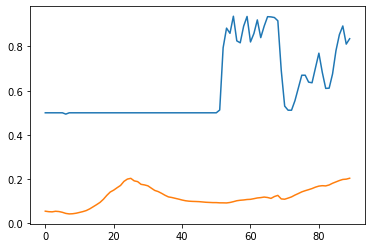

iter = 90 , acc = 0.8779296875 , dcorr = 0.20791867131584318
Iter: 90, D: 2.105, G:0.6627
loss:  0.6597956418991089



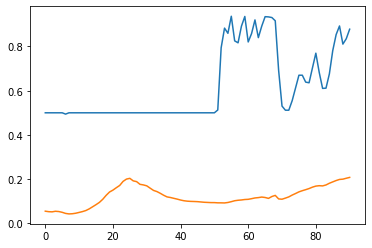

iter = 91 , acc = 0.83984375 , dcorr = 0.20982384187356598
Iter: 91, D: 2.108, G:0.6553
loss:  0.6546491384506226



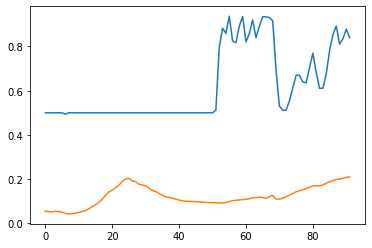

iter = 92 , acc = 0.7333984375 , dcorr = 0.20916778955783769
Iter: 92, D: 2.11, G:0.6525
loss:  0.6507126092910767



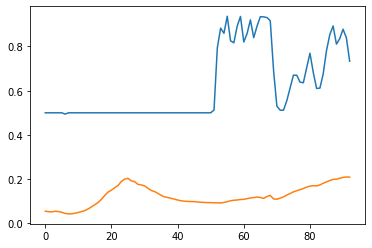

iter = 93 , acc = 0.744140625 , dcorr = 0.21239172793709352
Iter: 93, D: 2.107, G:0.6607
loss:  0.658953070640564



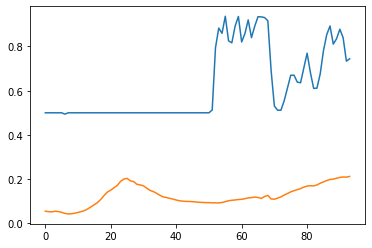

iter = 94 , acc = 0.8466796875 , dcorr = 0.21812469755305403
Iter: 94, D: 2.104, G:0.6611
loss:  0.6608749628067017



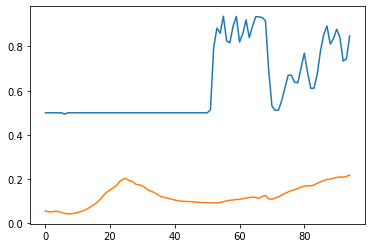

iter = 95 , acc = 0.927734375 , dcorr = 0.2229950795413082
Iter: 95, D: 2.109, G:0.6563
loss:  0.6548436880111694



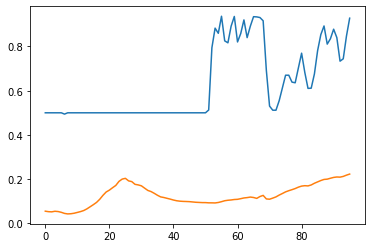

iter = 96 , acc = 0.94140625 , dcorr = 0.22615112069047363
Iter: 96, D: 2.112, G:0.6551
loss:  0.6530881524085999



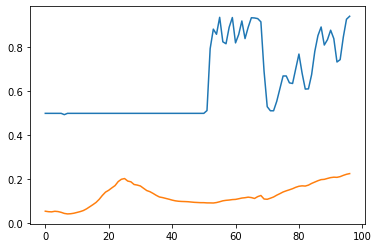

iter = 97 , acc = 0.9443359375 , dcorr = 0.22628049391075883
Iter: 97, D: 2.114, G:0.6495
loss:  0.6494495868682861



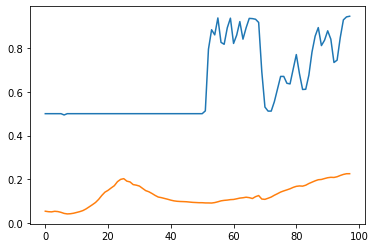

iter = 98 , acc = 0.9345703125 , dcorr = 0.2262935869090436
Iter: 98, D: 2.116, G:0.6494
loss:  0.6458002924919128



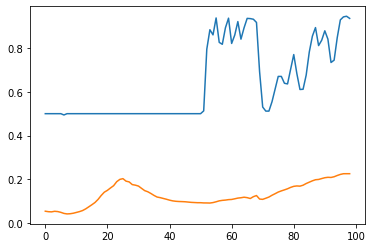

iter = 99 , acc = 0.904296875 , dcorr = 0.22669592810075112
Iter: 99, D: 2.115, G:0.6503
loss:  0.6493589282035828



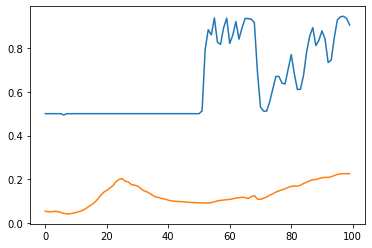

iter = 100 , acc = 0.8740234375 , dcorr = 0.22846654642668915
Iter: 100, D: 2.117, G:0.6476
loss:  0.6467519998550415



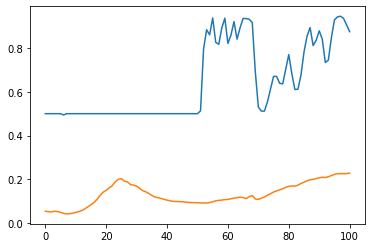

iter = 101 , acc = 0.88671875 , dcorr = 0.23145517517295058
Iter: 101, D: 2.121, G:0.6553
loss:  0.6428614854812622



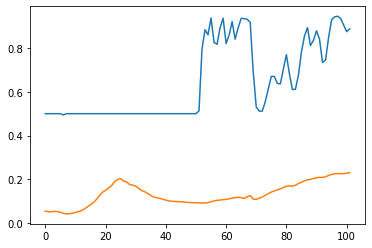

iter = 102 , acc = 0.904296875 , dcorr = 0.23375413483725352
Iter: 102, D: 2.117, G:0.6497
loss:  0.6461306214332581



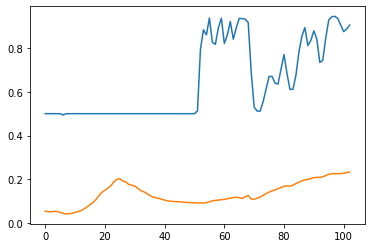

iter = 103 , acc = 0.9169921875 , dcorr = 0.23729305871436457
Iter: 103, D: 2.124, G:0.641
loss:  0.6388644576072693



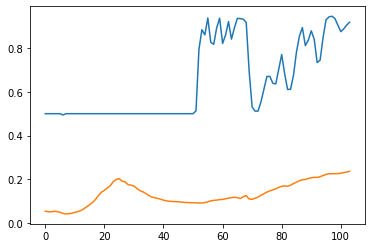

iter = 104 , acc = 0.92578125 , dcorr = 0.24078680560580637
Iter: 104, D: 2.123, G:0.6505
loss:  0.6407368183135986



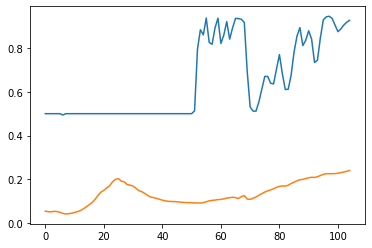

iter = 105 , acc = 0.935546875 , dcorr = 0.24325755894149512
Iter: 105, D: 2.124, G:0.6448
loss:  0.6400420665740967



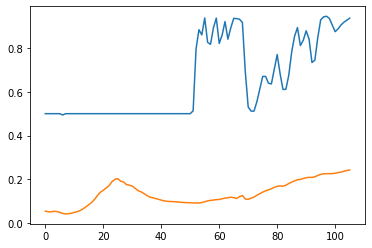

iter = 106 , acc = 0.9287109375 , dcorr = 0.244300799479875
Iter: 106, D: 2.13, G:0.6349
loss:  0.6325430870056152



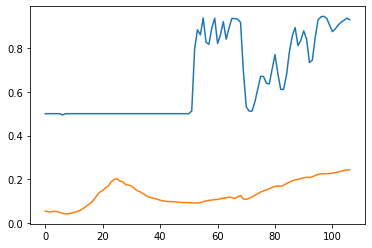

iter = 107 , acc = 0.9111328125 , dcorr = 0.24553760813054293
Iter: 107, D: 2.131, G:0.6344
loss:  0.6330405473709106



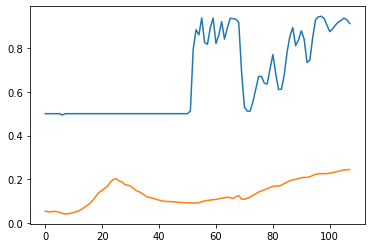

iter = 108 , acc = 0.8818359375 , dcorr = 0.246330340928734
Iter: 108, D: 2.132, G:0.6444
loss:  0.6289481520652771



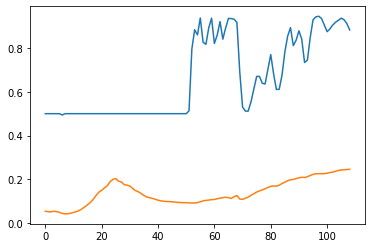

iter = 109 , acc = 0.888671875 , dcorr = 0.2475557265783017
Iter: 109, D: 2.132, G:0.6323
loss:  0.6318295001983643



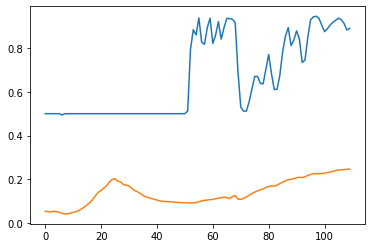

iter = 110 , acc = 0.9208984375 , dcorr = 0.24967369505212147
Iter: 110, D: 2.131, G:0.6328
loss:  0.6321929693222046



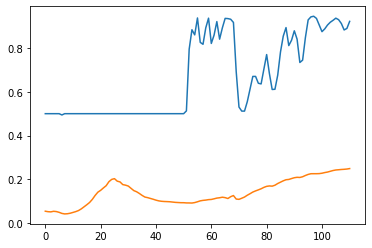

iter = 111 , acc = 0.9228515625 , dcorr = 0.251187805174016
Iter: 111, D: 2.149, G:0.6211
loss:  0.6133266687393188



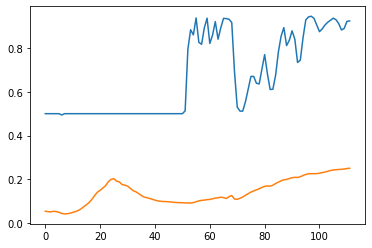

iter = 112 , acc = 0.916015625 , dcorr = 0.25228243343154483
Iter: 112, D: 2.141, G:0.6288
loss:  0.6213206052780151



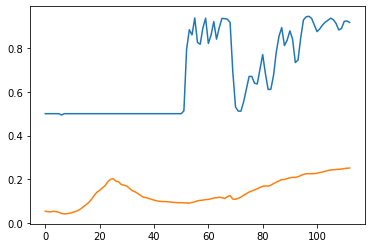

iter = 113 , acc = 0.9296875 , dcorr = 0.2543909774255797
Iter: 113, D: 2.139, G:0.632
loss:  0.6233240365982056



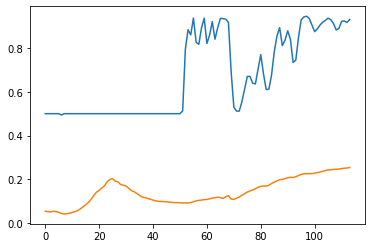

iter = 114 , acc = 0.9150390625 , dcorr = 0.2551354128353558
Iter: 114, D: 2.144, G:0.6165
loss:  0.6145708560943604



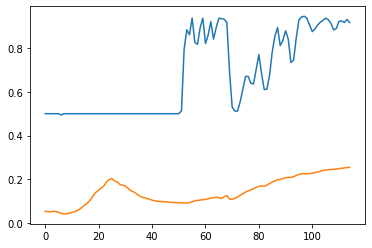

iter = 115 , acc = 0.919921875 , dcorr = 0.2569137857228876
Iter: 115, D: 2.147, G:0.6154
loss:  0.6153658628463745



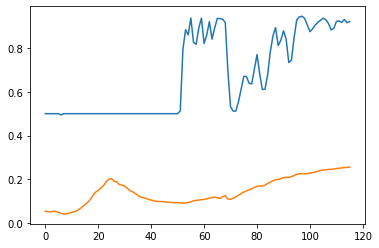

iter = 116 , acc = 0.9072265625 , dcorr = 0.2577774157682723
Iter: 116, D: 2.152, G:0.6093
loss:  0.6087872982025146



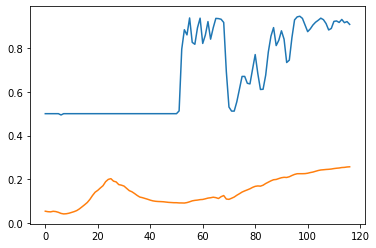

iter = 117 , acc = 0.9091796875 , dcorr = 0.2590374884213308
Iter: 117, D: 2.149, G:0.6151
loss:  0.6141518354415894



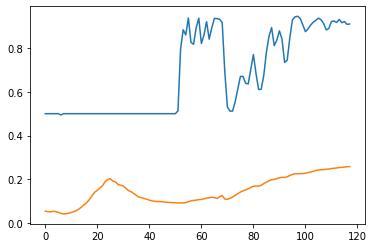

iter = 118 , acc = 0.93359375 , dcorr = 0.26078100399289433
Iter: 118, D: 2.155, G:0.607
loss:  0.6062576174736023



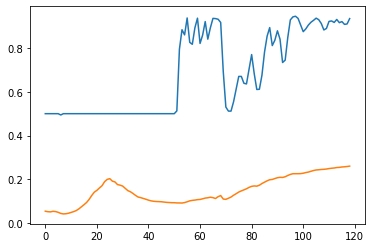

iter = 119 , acc = 0.9423828125 , dcorr = 0.26231624183257
Iter: 119, D: 2.158, G:0.6049
loss:  0.6047801375389099



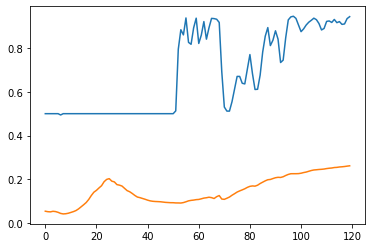

iter = 120 , acc = 0.9404296875 , dcorr = 0.26236518783626395
Iter: 120, D: 2.164, G:0.5964
loss:  0.5960752964019775



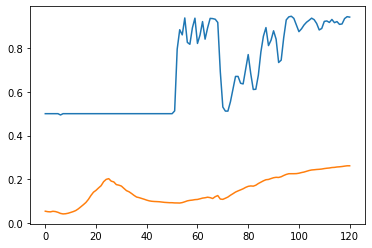

iter = 121 , acc = 0.912109375 , dcorr = 0.2623625269807183
Iter: 121, D: 2.158, G:0.6021
loss:  0.6008762717247009



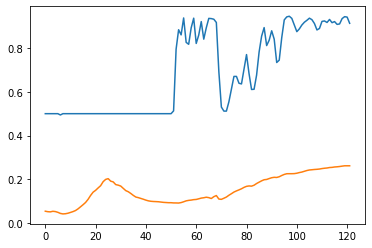

iter = 122 , acc = 0.8720703125 , dcorr = 0.2633373965636815
Iter: 122, D: 2.174, G:0.5862
loss:  0.5853340029716492



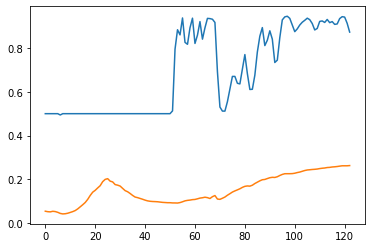

iter = 123 , acc = 0.8974609375 , dcorr = 0.264792660261604
Iter: 123, D: 2.157, G:0.6033
loss:  0.6031438708305359



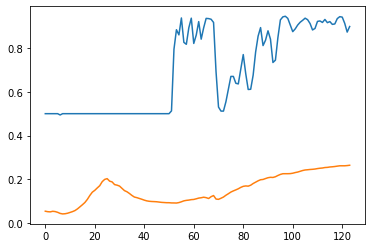

iter = 124 , acc = 0.9248046875 , dcorr = 0.266497919900623
Iter: 124, D: 2.177, G:0.589
loss:  0.5852813720703125



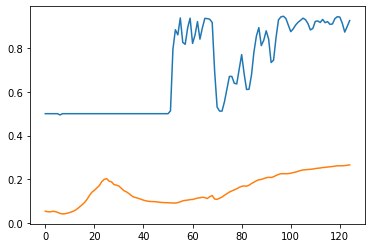

iter = 125 , acc = 0.9365234375 , dcorr = 0.268228678076858
Iter: 125, D: 2.163, G:0.6107
loss:  0.5977247357368469



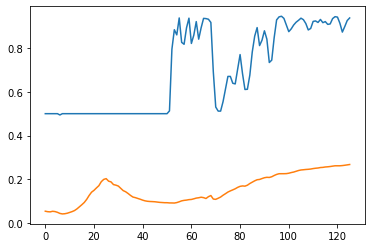

iter = 126 , acc = 0.9404296875 , dcorr = 0.26985175409101886
Iter: 126, D: 2.176, G:0.5907
loss:  0.5840994119644165



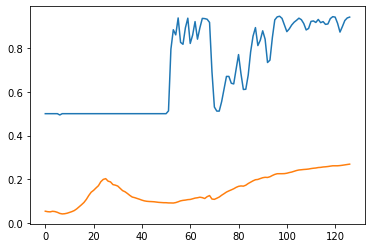

iter = 127 , acc = 0.92578125 , dcorr = 0.27085825425179344
Iter: 127, D: 2.173, G:0.591
loss:  0.5863498449325562



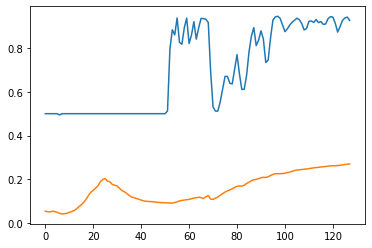

iter = 128 , acc = 0.9189453125 , dcorr = 0.27216547649147826
Iter: 128, D: 2.18, G:0.583
loss:  0.5826494693756104



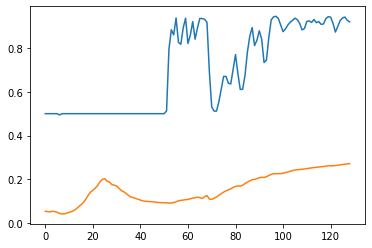

iter = 129 , acc = 0.9189453125 , dcorr = 0.2739779505229068
Iter: 129, D: 2.192, G:0.567
loss:  0.5664963722229004



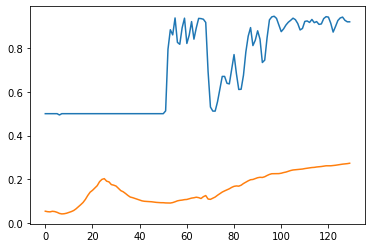

iter = 130 , acc = 0.9287109375 , dcorr = 0.275587613150382
Iter: 130, D: 2.191, G:0.5878
loss:  0.5707785487174988



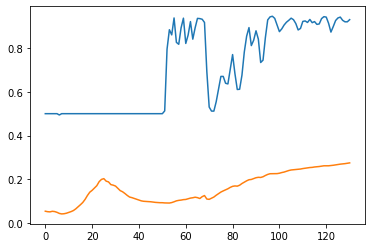

iter = 131 , acc = 0.9365234375 , dcorr = 0.2767070624480186
Iter: 131, D: 2.191, G:0.5732
loss:  0.5694523453712463



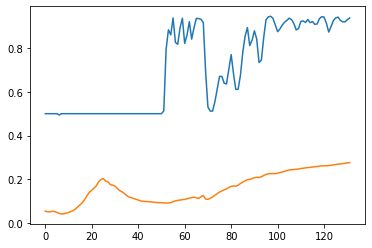

iter = 132 , acc = 0.9404296875 , dcorr = 0.2778177714490698
Iter: 132, D: 2.191, G:0.5716
loss:  0.5707195997238159



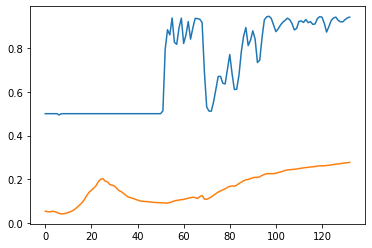

iter = 133 , acc = 0.919921875 , dcorr = 0.27904776024379
Iter: 133, D: 2.199, G:0.5604
loss:  0.5601009726524353



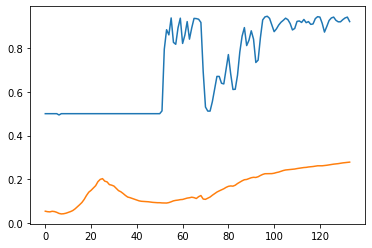

iter = 134 , acc = 0.900390625 , dcorr = 0.2801732321931168
Iter: 134, D: 2.199, G:0.5657
loss:  0.5623490810394287



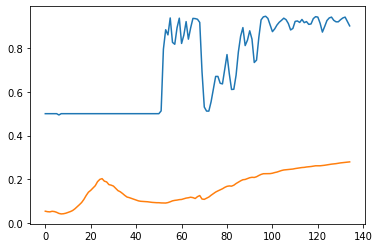

iter = 135 , acc = 0.9150390625 , dcorr = 0.28057331709415856
Iter: 135, D: 2.191, G:0.5727
loss:  0.5685590505599976



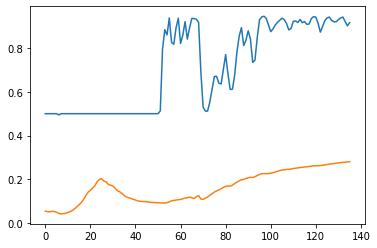

iter = 136 , acc = 0.9248046875 , dcorr = 0.2810016848173471
Iter: 136, D: 2.199, G:0.567
loss:  0.5629081726074219



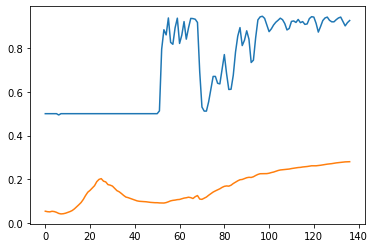

iter = 137 , acc = 0.9306640625 , dcorr = 0.28185278609310604
Iter: 137, D: 2.209, G:0.5509
loss:  0.5507749915122986



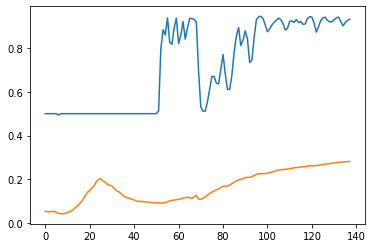

iter = 138 , acc = 0.9267578125 , dcorr = 0.2831625586659418
Iter: 138, D: 2.219, G:0.5414
loss:  0.5405431389808655



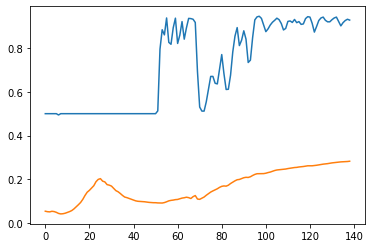

iter = 139 , acc = 0.9169921875 , dcorr = 0.284311893779361
Iter: 139, D: 2.211, G:0.5511
loss:  0.5501234531402588



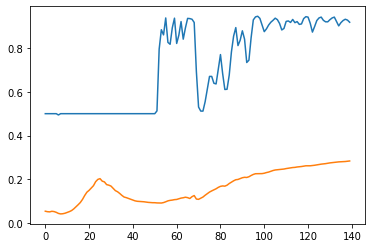

iter = 140 , acc = 0.9267578125 , dcorr = 0.28502593698676426
Iter: 140, D: 2.212, G:0.5486
loss:  0.5485838055610657



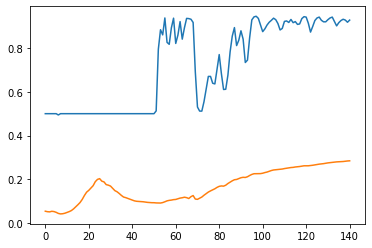

iter = 141 , acc = 0.9326171875 , dcorr = 0.2857409961246982
Iter: 141, D: 2.226, G:0.5452
loss:  0.5363020896911621



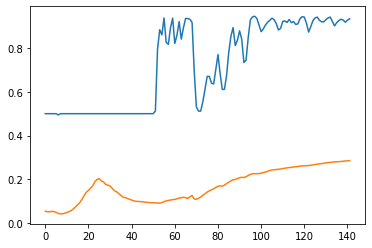

iter = 142 , acc = 0.927734375 , dcorr = 0.28672267193412104
Iter: 142, D: 2.24, G:0.5196
loss:  0.5195138454437256



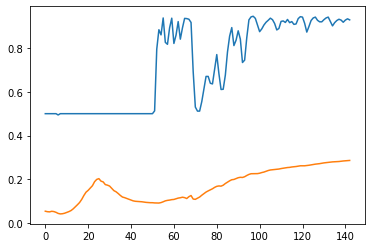

iter = 143 , acc = 0.93359375 , dcorr = 0.28728824654997986
Iter: 143, D: 2.231, G:0.5316
loss:  0.5293378829956055



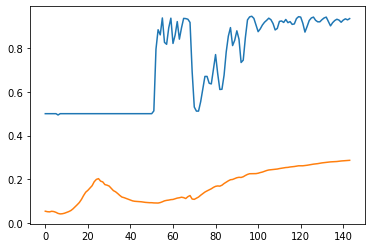

iter = 144 , acc = 0.9326171875 , dcorr = 0.2881442594221022
Iter: 144, D: 2.234, G:0.5277
loss:  0.5264065265655518



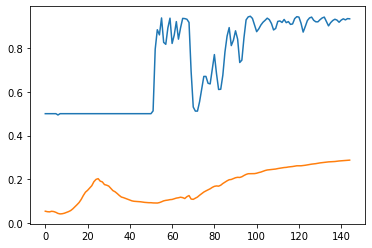

iter = 145 , acc = 0.927734375 , dcorr = 0.28933601060374914
Iter: 145, D: 2.236, G:0.5295
loss:  0.5235995054244995



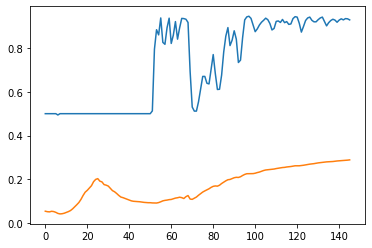

iter = 146 , acc = 0.9169921875 , dcorr = 0.2904067869774837
Iter: 146, D: 2.245, G:0.5177
loss:  0.5163095593452454



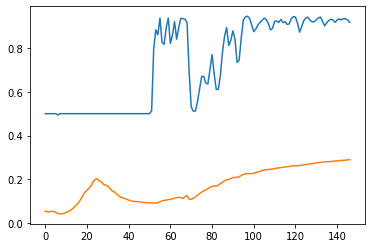

iter = 147 , acc = 0.9169921875 , dcorr = 0.29121971333642244
Iter: 147, D: 2.234, G:0.5287
loss:  0.5287225246429443



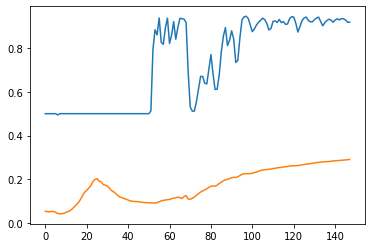

iter = 148 , acc = 0.9208984375 , dcorr = 0.2916489474359901
Iter: 148, D: 2.261, G:0.5038
loss:  0.5015033483505249



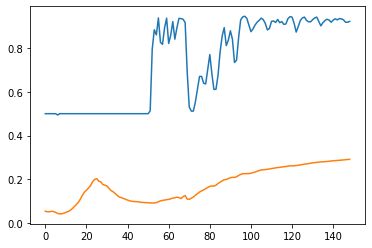

iter = 149 , acc = 0.921875 , dcorr = 0.2918713780632333
Iter: 149, D: 2.24, G:0.5205
loss:  0.5201815962791443



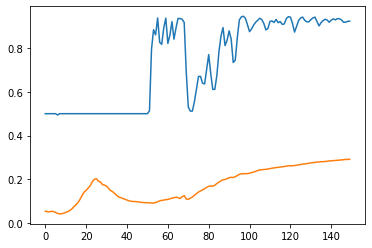

iter = 150 , acc = 0.9267578125 , dcorr = 0.29214420238164457
Iter: 150, D: 2.258, G:0.5096
loss:  0.5022020936012268



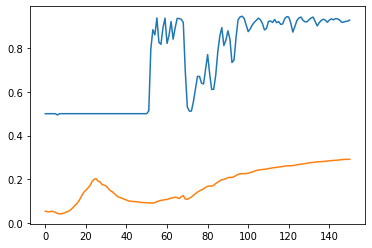

iter = 151 , acc = 0.93359375 , dcorr = 0.2926983440183288
Iter: 151, D: 2.258, G:0.513
loss:  0.5027445554733276



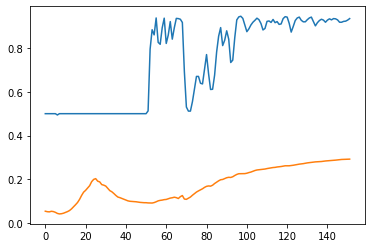

iter = 152 , acc = 0.9404296875 , dcorr = 0.2930628885228953
Iter: 152, D: 2.236, G:0.5334
loss:  0.5255714654922485



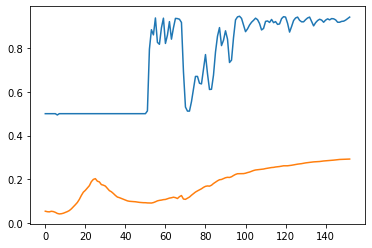

iter = 153 , acc = 0.9384765625 , dcorr = 0.2936101386004008
Iter: 153, D: 2.265, G:0.5324
loss:  0.49457675218582153



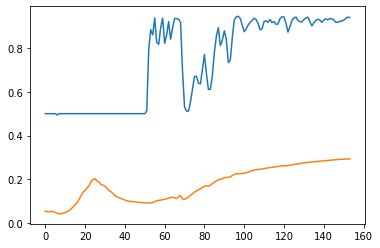

iter = 154 , acc = 0.9208984375 , dcorr = 0.29527038387622984
Iter: 154, D: 2.279, G:0.4863
loss:  0.4815070927143097



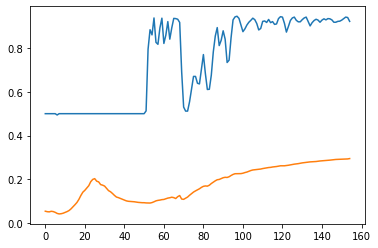

iter = 155 , acc = 0.921875 , dcorr = 0.2963815824396539
Iter: 155, D: 2.259, G:0.5053
loss:  0.5025264024734497



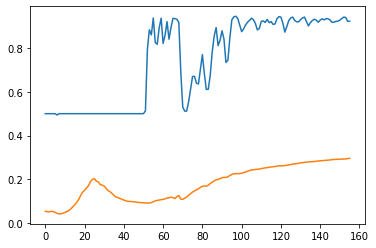

iter = 156 , acc = 0.9208984375 , dcorr = 0.29718609614813024
Iter: 156, D: 2.283, G:0.4809
loss:  0.4777778387069702



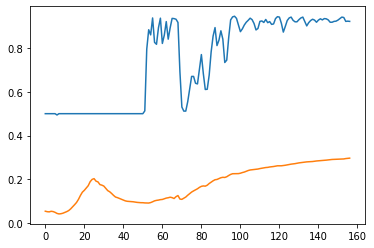

iter = 157 , acc = 0.9150390625 , dcorr = 0.29793653096105643
Iter: 157, D: 2.287, G:0.4809
loss:  0.47475332021713257



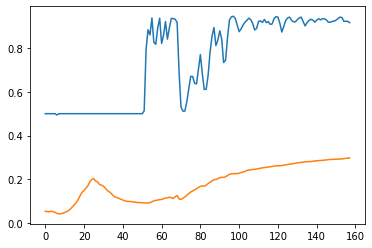

iter = 158 , acc = 0.9150390625 , dcorr = 0.2986111173970445
Iter: 158, D: 2.291, G:0.4711
loss:  0.47111251950263977



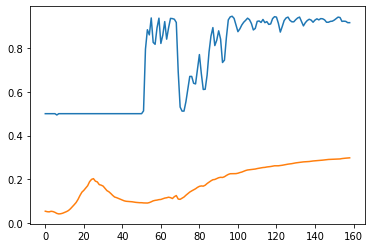

iter = 159 , acc = 0.923828125 , dcorr = 0.2984820548191449
Iter: 159, D: 2.283, G:0.4881
loss:  0.4784964323043823



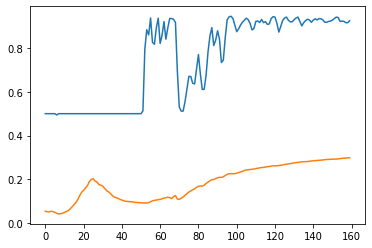

In [2]:
from datasets import toy_data
from nma_gan import get_optimizer, discriminator2, discriminator3
from nma_gan import classifier, discriminator_loss, generator_loss, run_a_gan
from torch import nn
from torch.utils.data import DataLoader
# reset_seed(0)
device="cpu"

D2 = discriminator2().to(device)
D3 = discriminator3().to(device)

G = classifier().to(device)

data_train = toy_data.ToyData()
loader_train = DataLoader(data_train, batch_size=128,
                          shuffle=True, drop_last=True, num_workers=2)

D_solver = get_optimizer(nn.ModuleList([D2, D3]))
G_solver = get_optimizer(G)

G, D2, D3 = run_a_gan(loader_train, D2, D3, G, D_solver, G_solver, discriminator_loss, 
                      device, show_every=1, num_epochs=20, l=500, acc_data=data_train)

1100
iter = 0 , acc = 0.5
Iter: 0, D: 2.157, G:2.289
loss:  0.6902778148651123

iter = 1 , acc = 0.5
Iter: 1, D: 2.152, G:2.146
loss:  0.6928572058677673

iter = 2 , acc = 0.5
Iter: 2, D: 2.153, G:2.063
loss:  0.6902420520782471

iter = 3 , acc = 0.5
Iter: 3, D: 2.144, G:1.693
loss:  0.6932255625724792

iter = 4 , acc = 0.5
Iter: 4, D: 2.139, G:1.771
loss:  0.6993738412857056

iter = 5 , acc = 0.5
Iter: 5, D: 2.132, G:1.673
loss:  0.7043860554695129

iter = 6 , acc = 0.5
Iter: 6, D: 2.125, G:1.626
loss:  0.7098404169082642

iter = 7 , acc = 0.5
Iter: 7, D: 2.129, G:1.517
loss:  0.7005894184112549

iter = 8 , acc = 0.5
Iter: 8, D: 2.131, G:1.411
loss:  0.695959210395813

iter = 9 , acc = 0.5
Iter: 9, D: 2.125, G:1.396
loss:  0.7016147375106812

iter = 10 , acc = 0.5
Iter: 10, D: 2.134, G:1.245
loss:  0.6892299652099609

iter = 11 , acc = 0.5
Iter: 11, D: 2.114, G:1.333
loss:  0.7086670398712158

iter = 12 , acc = 0.5
Iter: 12, D: 2.113, G:1.21
loss:  0.707364559173584

iter = 13 , acc =

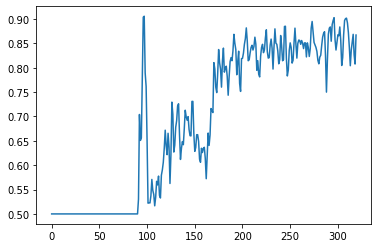

In [26]:
l = 700
r = 1500
while l < r:
    m = int((l + r) / 2)
    print(m)

    D2 = discriminator2().to(device)
    D3 = discriminator3().to(device)

    G = classifier().to(device)
    D_solver = get_optimizer(nn.ModuleList([D2, D3]))
    G_solver = get_optimizer(nn.ModuleList([G]))

    data_train = toy_data.ToyData(device=device, N=1024)
    loader_train = DataLoader(data_train, batch_size=128,
                              shuffle=True, drop_last=True)
    
    G, D2, D3 = run_a_gan(loader_train, D2, D3, G, D_solver, G_solver, discriminator_loss, 
                      device, show_every=1, num_epochs=20, l=m, acc_data=data_train)
    y_preds = G(data_train.x.view(-1, 1, 32, 32)).squeeze()
    y_preds = (torch.sign(y_preds) + 1) / 2
    train_acc = (torch.sum(y_preds == data_train.y) / len(data_train)).item()
    print("l =", m, ", acc =", train_acc)
    if train_acc < 0.81:
        r = m
    elif train_acc > 0.84:
        l = m + 1
    else:
        break
print("best l:", r, "-", l)

In [ ]:
import torch
l = 1
r = 250
accs = []
for i in range(l, r):
    print(i)
    
    D2 = discriminator2().to(device)
    D3 = discriminator3().to(device)

    G = classifier().to(device)
    D_solver = get_optimizer(nn.ModuleList([D2, D3]))
    G_solver = get_optimizer(nn.ModuleList([G]))

    data_train = toy_data.ToyData(device=device, N=1024)
    loader_train = DataLoader(data_train, batch_size=128,
                              shuffle=True, drop_last=True)
    
    G, D2, D3 = run_a_gan(loader_train, D2, D3, G, D_solver, G_solver, discriminator_loss, 
                          device, show_every=1, num_epochs=20, l=i)
    y_preds = G(data_train.x.view(-1, 1, 32, 32)).squeeze()
    y_preds = (torch.sign(y_preds) + 1) / 2
    train_acc = (torch.sum(y_preds == data_train.y) / len(data_train)).item()
    print("l =", i, ", acc =", train_acc)
    accs.append(train_acc)
    plt.close()
    plt.plot(range(l, i+1), accs)
#     plt.savefig("test.png")

Text(0, 0.5, 'sigma_A')

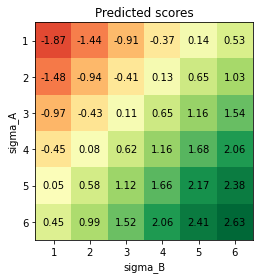

In [27]:
import torch
from datasets import toy_data
data = toy_data.full_toy_data(device=device)
# data += torch.normal(0, 0.01, size=(6, 6, 32, 32), device=device)
preds = G(data.view(-1, 1, 32, 32)).reshape(6, 6)
scale = max(torch.abs(torch.min(preds)), torch.abs(torch.max(preds)))
fig, ax = plt.subplots()
im = ax.imshow(preds.detach().cpu().numpy(), cmap="RdYlGn", vmin=-scale, vmax=scale)

ax.set_xticks(np.arange(preds.shape[1]), labels=np.arange(preds.shape[1]) + 1)
ax.set_yticks(np.arange(preds.shape[0]), labels=np.arange(preds.shape[0]) + 1)
for i in range(preds.shape[0]):
    for j in range(preds.shape[1]):
        text = ax.text(j, i, f"{preds[i, j]:0.2f}",
                       ha="center", va="center", color="k")
ax.set_title("Predicted scores")
ax.set_xlabel('sigma_B')
ax.set_ylabel('sigma_A')

In [418]:
print(data_train.mf[2], data_train.cf[2])

tensor(1.6351) tensor(1.2654)


In [419]:
sample = torch.clone(data_train.x[2, :, :, 0])

In [420]:
G(sample.view(1, 1, 32, 32)).item()

-1.5517332553863525

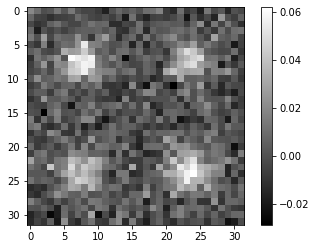

In [421]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [422]:
sample[16:, :16] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 + torch.normal(0, 0.01, size=(16, 16))
sample[:16, 16:] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 + torch.normal(0, 0.01, size=(16, 16))

In [423]:
G(sample.view(1, 1, 32, 32)).item()

-1.7824057340621948

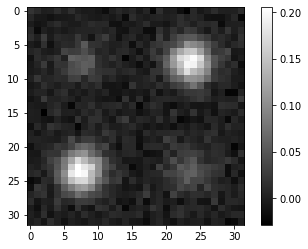

In [424]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [373]:
sample[:16, :16] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 + torch.normal(0, 0.01, size=(16, 16))
sample[16:, 16:] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 + torch.normal(0, 0.01, size=(16, 16))

In [374]:
G(sample.view(1, 1, 32, 32)).item()

5.268155574798584

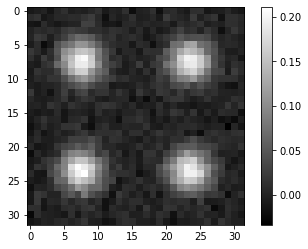

In [375]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [378]:
good_classifier = G

## Generate complete data


In [4]:
import nma_gan
from nma_gan import get_optimizer, discriminator1, encoder, discriminator2, discriminator3
from nma_gan import generator, discriminator_loss, generator_loss, run_real_gan
from torch import nn
from torch.utils.data import DataLoader
# reset_seed(0)
device="cpu"

ENC = encoder(classifier=good_classifier)

D1 = discriminator1().to(device)
D2 = discriminator2().to(device)
D3 = discriminator3().to(device)

G = generator().to(device)

data_train = nma_gan.ToyData()
loader_train = DataLoader(data_train, batch_size=128,
                          shuffle=True, drop_last=True, num_workers=2)

D_solver = get_optimizer(nn.ModuleList([D1, D2, D3]))
G_solver = get_optimizer(G)

G, ENC, D1, D2, D3 = run_real_gan(loader_train, D1, D2, D3, G, ENC, D_solver, G_solver, discriminator_loss, generator_loss,
                      device, 'fc_gan_results.jpg', show_every=1, num_epochs=10, l=10)

NameError: name 'good_classifier' is not defined

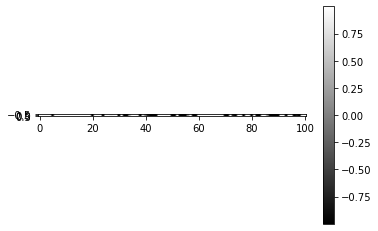

In [398]:
from nma_gan import sample_noise
g_fake_seed = sample_noise(1, 96, dtype=sample.dtype, device=sample.device)
fake_features_and_preds = G(g_fake_seed)
import matplotlib.pyplot as plt
plt.imshow(fake_features_and_preds.detach(),cmap='gray')
plt.colorbar()

Iter: 0, loss: 91111.2265625


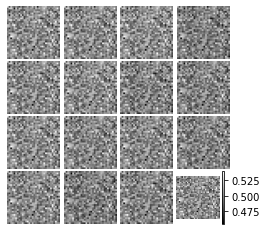


Iter: 8, loss: 8069.080078125


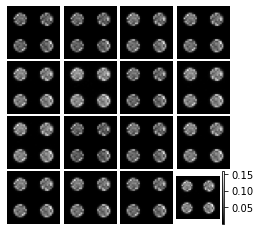


Iter: 16, loss: 7335.8515625


<Figure size 432x288 with 0 Axes>

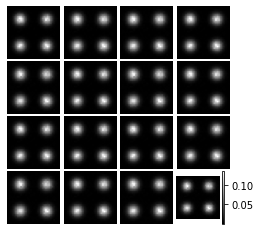


Iter: 24, loss: 7114.06689453125


<Figure size 432x288 with 0 Axes>

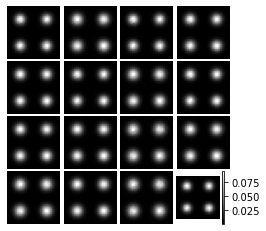


Iter: 32, loss: 7188.59326171875


<Figure size 432x288 with 0 Axes>

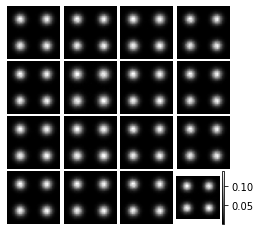


Iter: 40, loss: 7457.419921875


<Figure size 432x288 with 0 Axes>

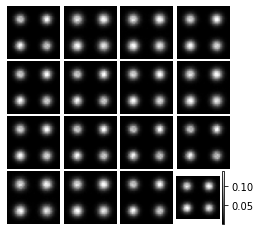


Iter: 48, loss: 7386.0888671875


<Figure size 432x288 with 0 Axes>

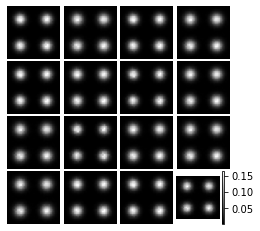


Iter: 56, loss: 7268.8232421875


<Figure size 432x288 with 0 Axes>

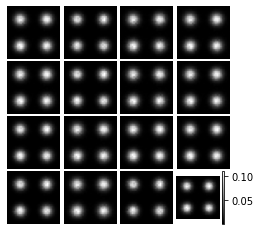


Iter: 64, loss: 7149.3564453125


<Figure size 432x288 with 0 Axes>

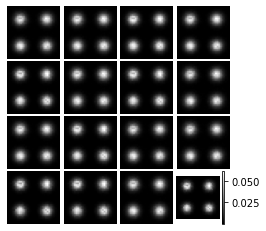


Iter: 72, loss: 7423.83447265625


<Figure size 432x288 with 0 Axes>

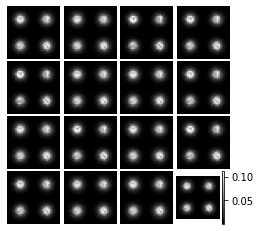


Iter: 80, loss: 7308.9501953125


<Figure size 432x288 with 0 Axes>

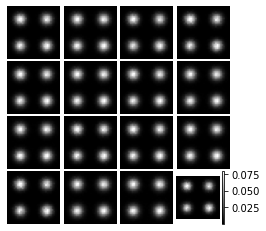


Iter: 88, loss: 7269.71044921875


<Figure size 432x288 with 0 Axes>

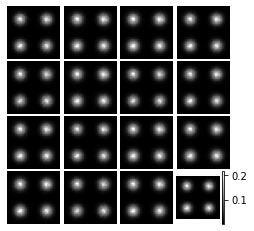


Iter: 96, loss: 7257.95849609375


<Figure size 432x288 with 0 Axes>

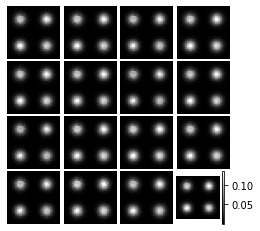


Iter: 104, loss: 6968.1376953125


<Figure size 432x288 with 0 Axes>

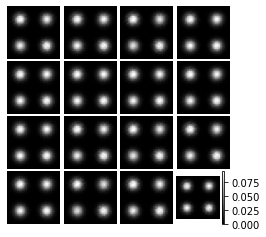


Iter: 112, loss: 7507.82763671875


<Figure size 432x288 with 0 Axes>

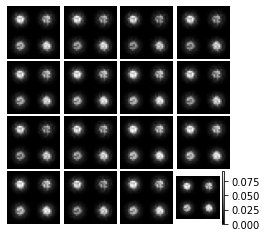


Iter: 120, loss: 7272.05859375


<Figure size 432x288 with 0 Axes>

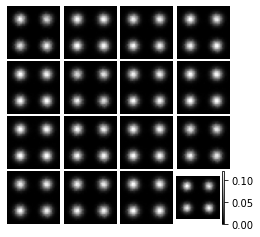


Iter: 128, loss: 7215.51318359375


<Figure size 432x288 with 0 Axes>

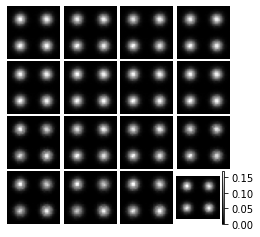


Iter: 136, loss: 7437.47998046875


<Figure size 432x288 with 0 Axes>

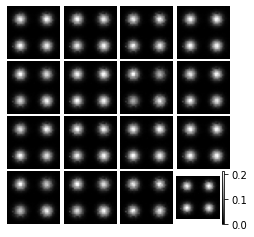


Iter: 144, loss: 7546.1943359375


<Figure size 432x288 with 0 Axes>

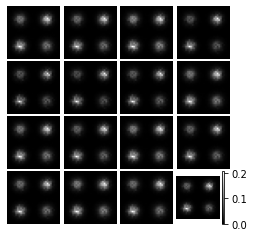


Iter: 152, loss: 7227.3896484375


<Figure size 432x288 with 0 Axes>

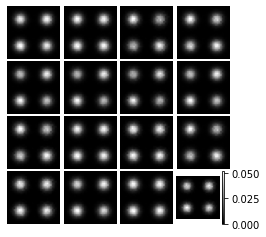


Iter: 160, loss: 7426.201171875


<Figure size 432x288 with 0 Axes>

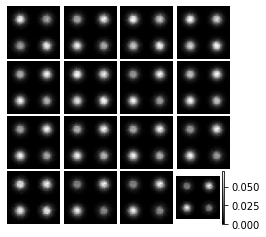


Iter: 168, loss: 7066.26220703125


<Figure size 432x288 with 0 Axes>

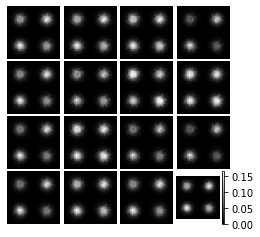


Iter: 176, loss: 6966.76513671875


<Figure size 432x288 with 0 Axes>

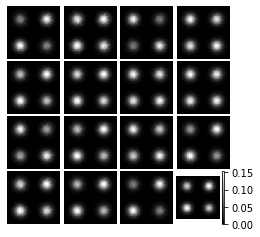


Iter: 184, loss: 7459.52685546875


<Figure size 432x288 with 0 Axes>

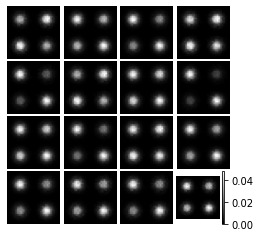


Iter: 192, loss: 7171.45556640625


<Figure size 432x288 with 0 Axes>

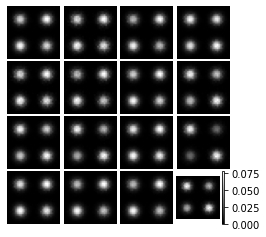


Iter: 200, loss: 7153.69140625


<Figure size 432x288 with 0 Axes>

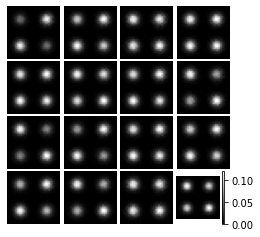


Iter: 208, loss: 7350.0068359375


<Figure size 432x288 with 0 Axes>

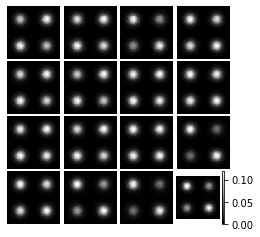


Iter: 216, loss: 7138.27685546875


<Figure size 432x288 with 0 Axes>

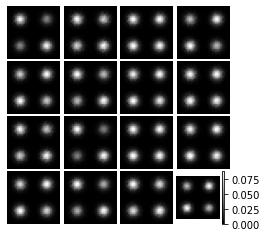


Iter: 224, loss: 7135.333984375


<Figure size 432x288 with 0 Axes>

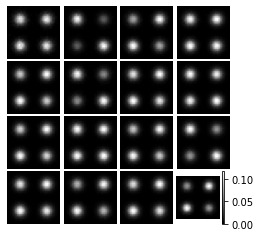


Iter: 232, loss: 7611.91015625


<Figure size 432x288 with 0 Axes>

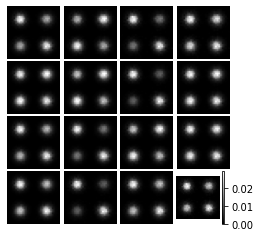


Iter: 240, loss: 7245.3544921875


<Figure size 432x288 with 0 Axes>

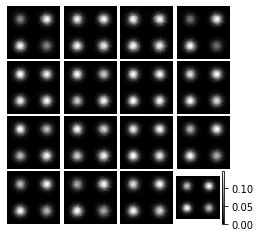

<Figure size 432x288 with 0 Axes>

In [403]:
from nma_gan import decoder, train_decoder, get_optimizer
DEC = decoder()
optim = get_optimizer(DEC, lr=1e-2)
DEC = train_decoder(loader_train, ENC, DEC, optim, device, num_epochs=30)

## Regularized Classifier

iter = 0 , acc = 0.5 , dcorr = 0.011748485128392685
Iter: 0, G:0.7422
loss:  0.689801812171936



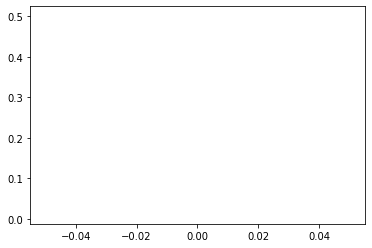

iter = 50 , acc = 0.5 , dcorr = 0.008200867315847035
Iter: 50, G:0.6937
loss:  0.6936542987823486



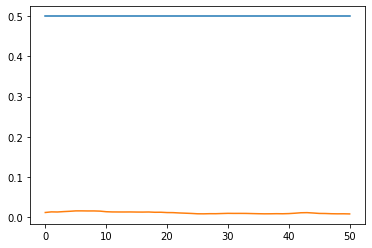

iter = 100 , acc = 0.5263671875 , dcorr = 0.20733961373931467
Iter: 100, G:0.6929
loss:  0.6929125785827637



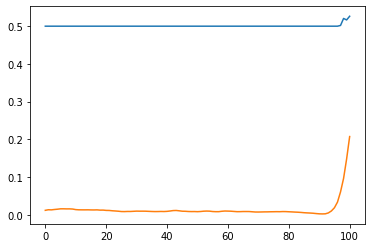

iter = 150 , acc = 0.5302734375 , dcorr = 0.2445626726087387
Iter: 150, G:0.6762
loss:  0.6759911775588989



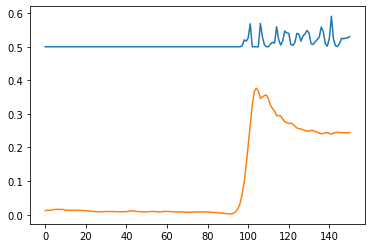

iter = 200 , acc = 0.51953125 , dcorr = 0.27859574984279534
Iter: 200, G:0.623
loss:  0.622408390045166



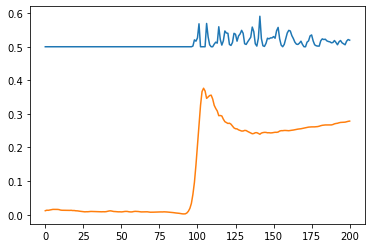

iter = 250 , acc = 0.5576171875 , dcorr = 0.30950650170974425
Iter: 250, G:0.5805
loss:  0.5784940719604492



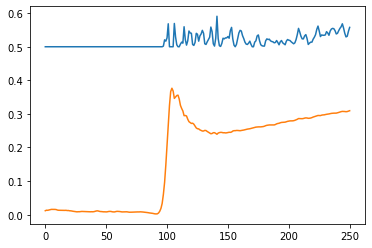

iter = 300 , acc = 0.5751953125 , dcorr = 0.33557406992610905
Iter: 300, G:0.5594
loss:  0.5584309697151184



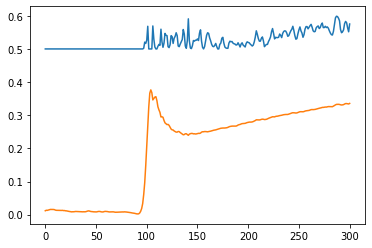

iter = 350 , acc = 0.5732421875 , dcorr = 0.3559819464524698
Iter: 350, G:0.5163
loss:  0.5141473412513733



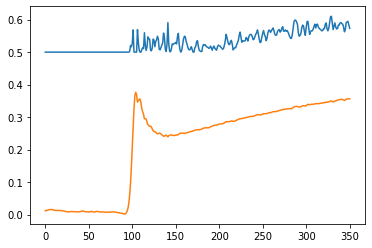

iter = 400 , acc = 0.6171875 , dcorr = 0.36981164594115934
Iter: 400, G:0.4855
loss:  0.48322999477386475



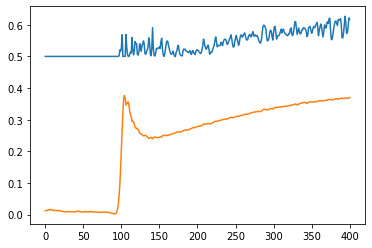

iter = 450 , acc = 0.6318359375 , dcorr = 0.38080763819068264
Iter: 450, G:0.4566
loss:  0.45518356561660767



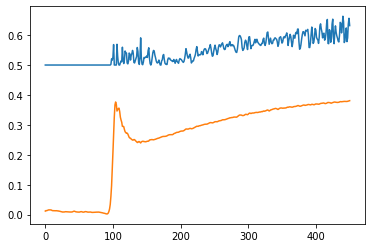

iter = 500 , acc = 0.5791015625 , dcorr = 0.38364598650865916
Iter: 500, G:0.3586
loss:  0.3580619692802429



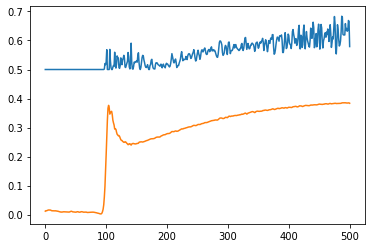

iter = 550 , acc = 0.728515625 , dcorr = 0.3838323605257159
Iter: 550, G:0.4266
loss:  0.4232670068740845



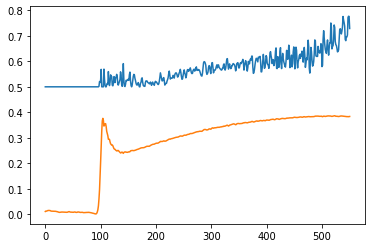

iter = 600 , acc = 0.8115234375 , dcorr = 0.38352376246196285
Iter: 600, G:0.4303
loss:  0.4287117123603821



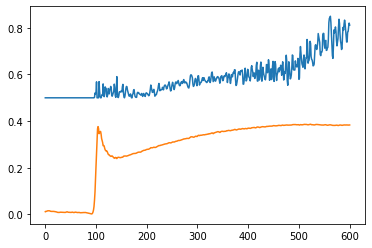

iter = 650 , acc = 0.8017578125 , dcorr = 0.3833734426534362
Iter: 650, G:0.4389
loss:  0.4388783574104309



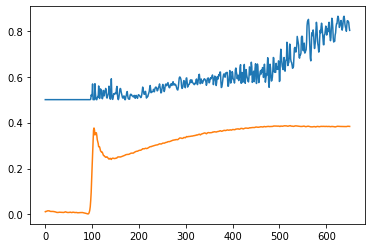

iter = 700 , acc = 0.8701171875 , dcorr = 0.3828048109666991
Iter: 700, G:0.3843
loss:  0.37821459770202637



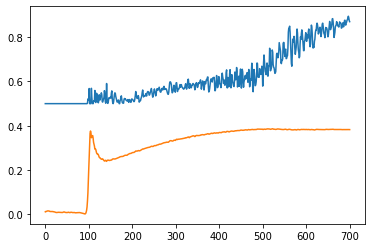

iter = 750 , acc = 0.87890625 , dcorr = 0.38228385432282547
Iter: 750, G:0.4366
loss:  0.43570634722709656



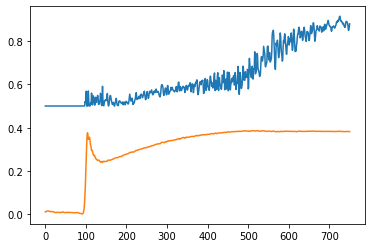

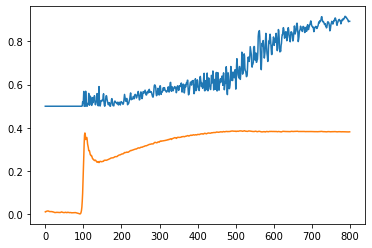

In [4]:
from datasets import toy_data
from nma_gan import get_optimizer
from nma_gan import classifier, discriminator_loss, generator_loss, run_regularized_classifier
from torch import nn
from torch.utils.data import DataLoader
# reset_seed(0)
device="cpu"

G = classifier().to(device)

data_train = toy_data.ToyData()
loader_train = DataLoader(data_train, batch_size=128,
                          shuffle=True, drop_last=True, num_workers=2)

G_solver = get_optimizer(G)

G = run_regularized_classifier(loader_train, G, G_solver,
                      device, show_every=50, num_epochs=100, l=0.015, acc_data=data_train)

In [ ]:
import torch
l = 5
r = 100
while l < r:
    m = int((l + r) / 2)
    print(m)

    G = classifier().to(device)

    G_solver = get_optimizer(G)

    data_train = toy_data.ToyData(device=device, N=1024)
    loader_train = DataLoader(data_train, batch_size=128,
                              shuffle=True, drop_last=True)
    
    G = run_regularized_classifier(loader_train, G, G_solver,
                      device, batch_size=128, show_every=50, num_epochs=50, l=m / 1000, acc_data=data_train)
    
    y_preds = G(data_train.x.view(-1, 1, 32, 32)).squeeze()
    y_preds = (torch.sign(y_preds) + 1) / 2
    train_acc = (torch.sum(y_preds == data_train.y) / len(data_train)).item()
    print("l =", m, ", acc =", train_acc)
    if train_acc < 0.81:
        r = m
    elif train_acc > 0.84:
        l = m + 1
    else:
        break
print("best l:", r, "-", l)

In [43]:
y_preds = G(data_train.x.view(-1, 1, 32, 32)).squeeze()
y_preds = (torch.sign(y_preds) + 1) / 2
train_acc = torch.sum(y_preds == data_train.y)
print((train_acc/len(data_train)).item())

0.81689453125


Text(0, 0.5, 'sigma_A')

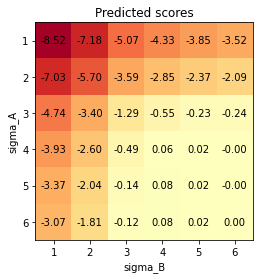

In [48]:
from datasets import toy_data
data = toy_data.full_toy_data(device=device)
# data += torch.normal(0, 0.01, size=(6, 6, 32, 32), device=device)
preds = G(data.view(-1, 1, 32, 32)).reshape(6, 6)
scale = max(torch.abs(torch.min(preds)), torch.abs(torch.max(preds)))
fig, ax = plt.subplots()
im = ax.imshow(preds.detach().cpu().numpy(), cmap="RdYlGn", vmin=-scale, vmax=scale)

ax.set_xticks(np.arange(preds.shape[1]), labels=np.arange(preds.shape[1]) + 1)
ax.set_yticks(np.arange(preds.shape[0]), labels=np.arange(preds.shape[0]) + 1)
for i in range(preds.shape[0]):
    for j in range(preds.shape[1]):
        text = ax.text(j, i, f"{preds[i, j]:0.2f}",
                       ha="center", va="center", color="k")
ax.set_title("Predicted scores")
ax.set_xlabel('sigma_B')
ax.set_ylabel('sigma_A')

## Preliminary face dataset experiments

In [22]:
import torch
import nma_gan
from nma_gan import get_optimizer, discriminator1, encoder, discriminator2, discriminator3
from nma_gan import generator, discriminator_loss, generator_loss, run_real_gan
from torch import nn
from torch.utils.data import DataLoader
# reset_seed(0)
device="cpu"

model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
model.eval()
model.classifier = nn.Sequential(*list(model.classifier.children())[:-3])
ENC = model

D1 = discriminator1(latent_dim=4096).to(device)
D2 = discriminator2().to(device)
D3 = discriminator3().to(device)

G = generator(latent_dim=4096).to(device)

data_train = nma_gan.FaceData()
loader_train = DataLoader(data_train, batch_size=128,
                          shuffle=True, drop_last=True, num_workers=2)

D_solver = get_optimizer(nn.ModuleList([D1, D2, D3]))
G_solver = get_optimizer(G)

Using cache found in C:\Users\jense/.cache\torch\hub\pytorch_vision_v0.10.0


In [23]:
G, ENC, D1, D2, D3 = run_real_gan(loader_train, D1, D2, D3, G, ENC, D_solver, G_solver, discriminator_loss, generator_loss,
                      device, 'fc_gan_results.jpg', show_every=1, num_epochs=10, l=10)

tensor([[2.0000, 0.2053, 1.0000],
        [6.0000, 0.9621, 0.0000],
        [5.0000, 0.9845, 0.0000],
        [5.0000, 0.5730, 1.0000],
        [6.0000, 0.5058, 0.0000],
        [6.0000, 0.2630, 1.0000],
        [2.0000, 0.2560, 0.0000],
        [5.0000, 0.3225, 1.0000],
        [2.0000, 0.0200, 0.0000],
        [3.0000, 0.5420, 1.0000],
        [2.0000, 0.0320, 0.0000],
        [5.0000, 0.0678, 1.0000],
        [6.0000, 0.9848, 0.0000],
        [2.0000, 0.5566, 0.0000],
        [3.0000, 0.5976, 0.0000],
        [6.0000, 0.0117, 0.0000],
        [2.0000, 0.6806, 1.0000],
        [5.0000, 0.7071, 1.0000],
        [3.0000, 0.0215, 1.0000],
        [2.0000, 0.5968, 0.0000],
        [5.0000, 0.1061, 1.0000],
        [4.0000, 0.7193, 1.0000],
        [4.0000, 0.9661, 0.0000],
        [6.0000, 0.2069, 0.0000],
        [4.0000, 0.6837, 1.0000],
        [1.0000, 0.3634, 0.0000],
        [5.0000, 0.4396, 0.0000],
        [6.0000, 0.9290, 0.0000],
        [2.0000, 0.1438, 1.0000],
        [2.000

KeyboardInterrupt: 

In [21]:
nma_gan.FaceData()

torch.float32
torch.bool
torch.float64
